In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# show all columns 
pd.set_option('display.max_columns', None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Load the datasets

In [26]:
train_file_path = "../input/house-prices-advanced-regression-techniques/train.csv"
test_file_path = "../input/house-prices-advanced-regression-techniques/test.csv"

# The file contains 81 variables, 38 numeric type, 43 object type
train_df = pd.read_csv(train_file_path)
print("train_df shape {}".format(train_df.shape))

# The file contains 80 variables, without the target variable (SalePrice)
test_df = pd.read_csv(test_file_path)
print("test_df shape {}".format(test_df.shape))


train_df shape (1460, 81)
test_df shape (1459, 80)


# Subsets. Divide data into training and validation

In [27]:
from sklearn.model_selection import train_test_split

# Separate target from predictors
y = train_df.SalePrice
# Delete ID column, do not contribute
X = train_df.drop(['SalePrice', 'Id'], axis=1)


# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

X_train_init = X_train_full.copy()
X_valid_init = X_valid_full.copy()
print("X_train_init, X_valid_init, y_train, y_valid", X_train_init.shape, X_valid_init.shape, y_train.shape, y_valid.shape)

X_train_init, X_valid_init, y_train, y_valid (1168, 79) (292, 79) (1168,) (292,)


In [45]:
X_train_init.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
618,20,RL,90.0,11694,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,452.0,Ex,TA,PConc,Ex,TA,Av,GLQ,48,Unf,0,1774,1822,GasA,Ex,Y,SBrkr,1828,0,0,1828,0,0,2,0,3,1,Gd,9,Typ,1,Gd,Attchd,2007.0,Unf,3,774,TA,TA,Y,0,108,0,0,260,0,NaN,NaN,NaN,0,7,2007,New,Partial
870,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosN,Norm,1Fam,1Story,5,5,1962,1962,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,Gd,N,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1962.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
92,30,RL,80.0,13360,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1921,2006,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,Gd,BrkTil,Gd,TA,No,ALQ,713,Unf,0,163,876,GasA,Ex,Y,SBrkr,964,0,0,964,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1921.0,Unf,2,432,TA,TA,Y,0,0,44,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal


In [28]:
# num type columns: 36
df_num_train = X_train_init.select_dtypes(include = ['float64', 'int64'])
df_num_train.head()
print("df_num_train", df_num_train.shape)

df_num_valid = X_valid_init.select_dtypes(include = ['float64', 'int64'])
df_num_valid.head()
print("df_num_valid", df_num_valid.shape)


df_num_train (1168, 36)
df_num_valid (292, 36)


In [29]:
# cat type columns: 43
df_cat_train = X_train_init.select_dtypes(include = ['object'])
df_cat_train.head()
print("df_cat_train", df_cat_train.shape)

df_cat_valid = X_valid_init.select_dtypes(include = ['object'])
df_cat_valid.head()
print("df_cat_valid", df_cat_valid.shape)

df_cat_train (1168, 43)
df_cat_valid (292, 43)


# First views
 - Plot the relationship between each column and the target on train data


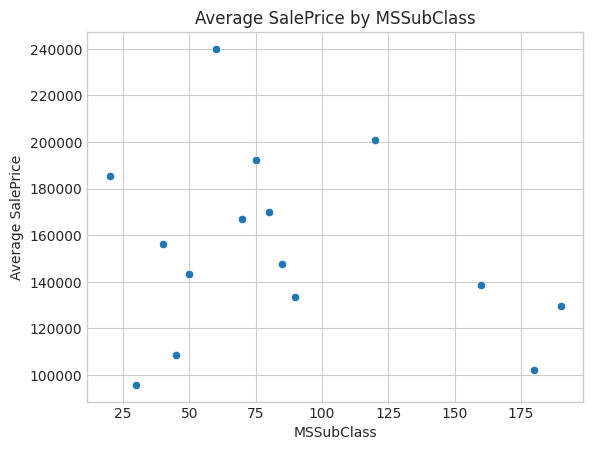

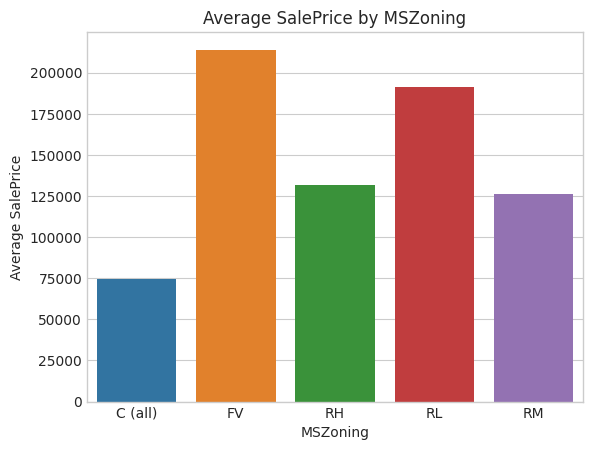

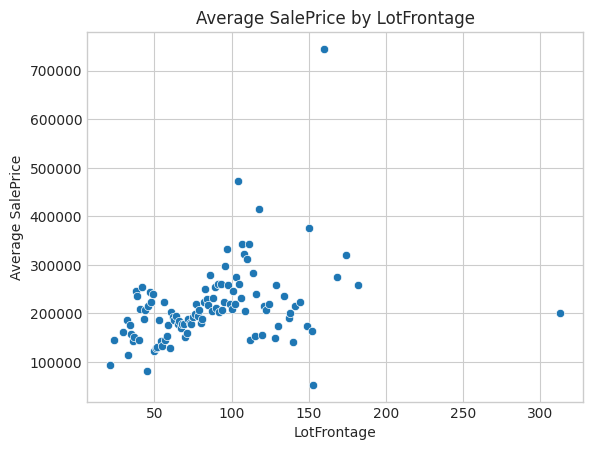

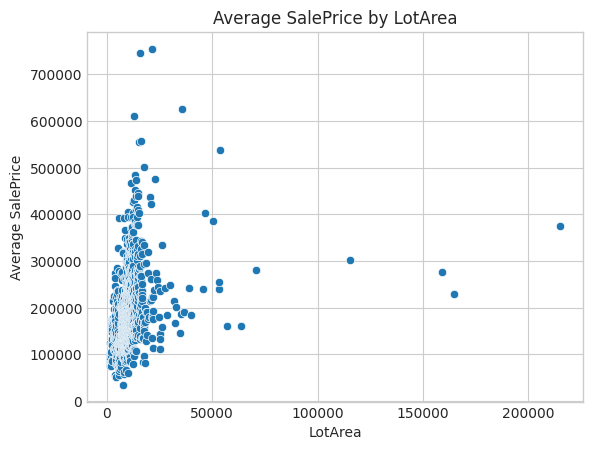

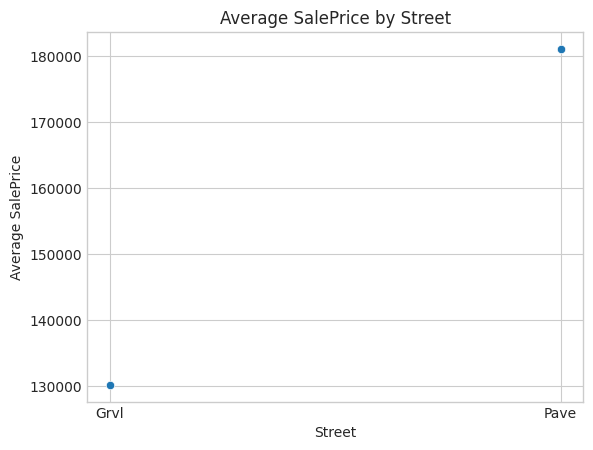

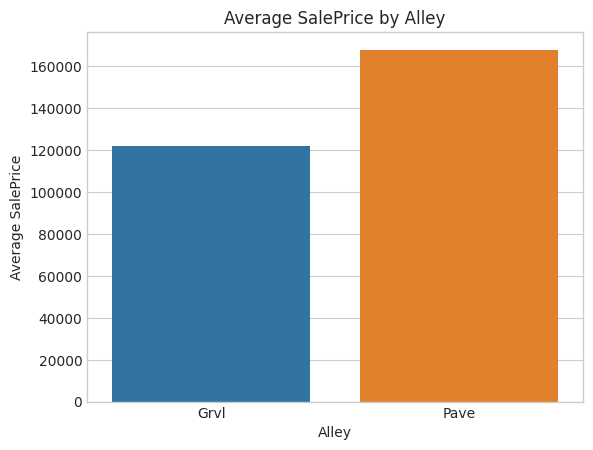

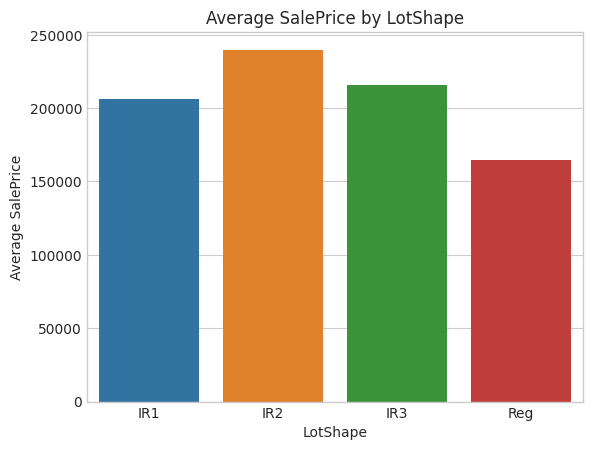

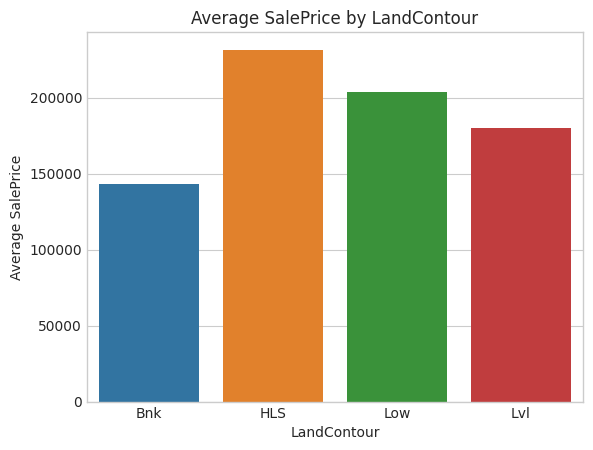

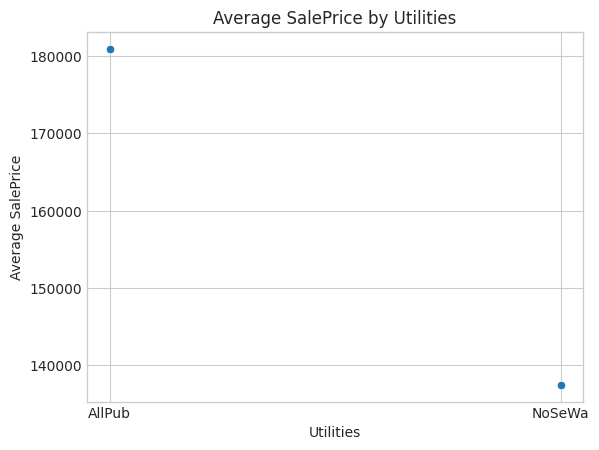

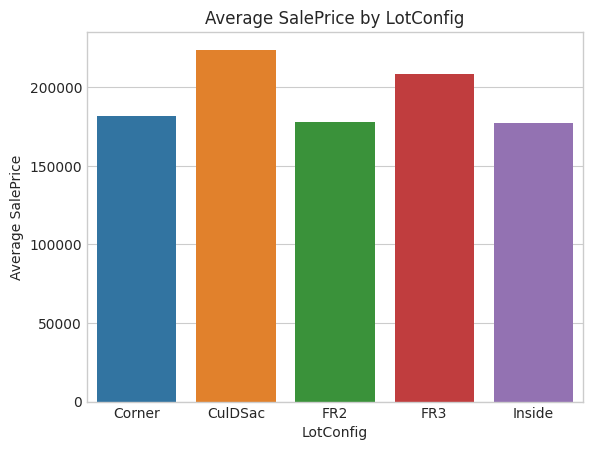

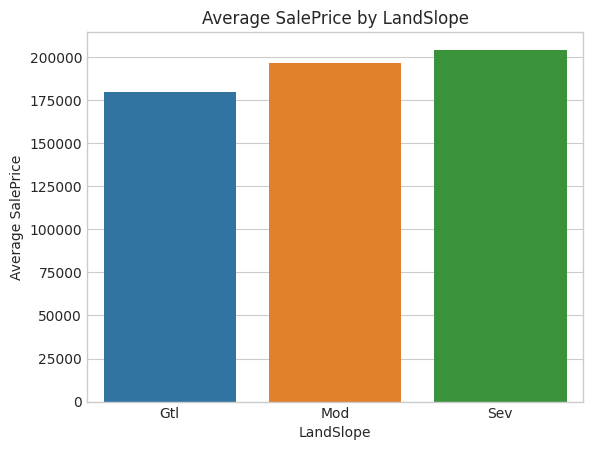

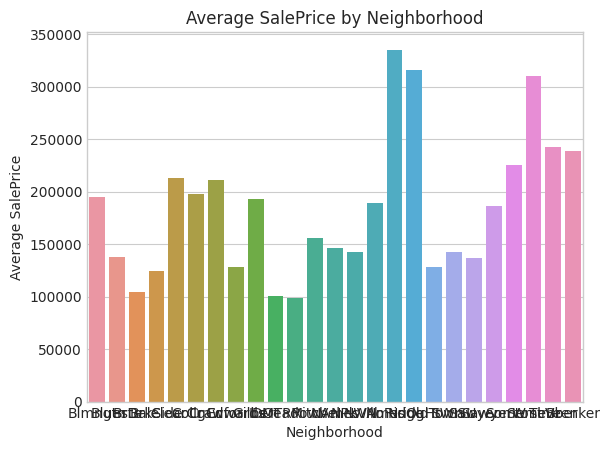

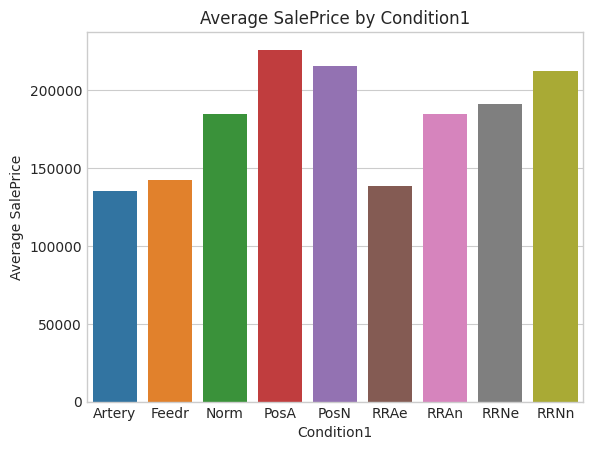

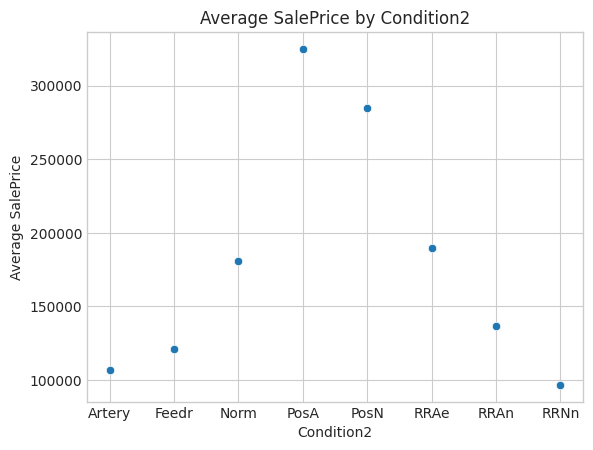

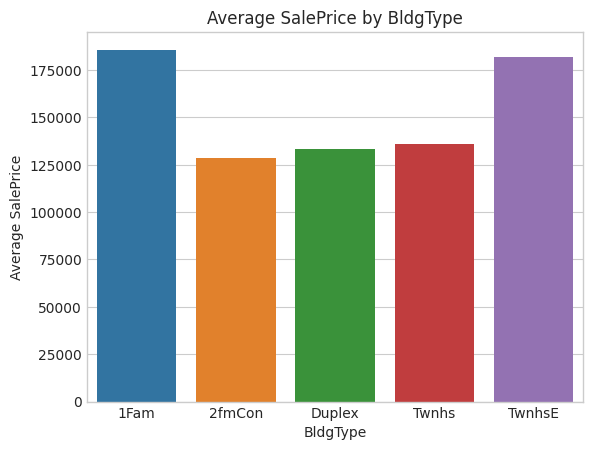

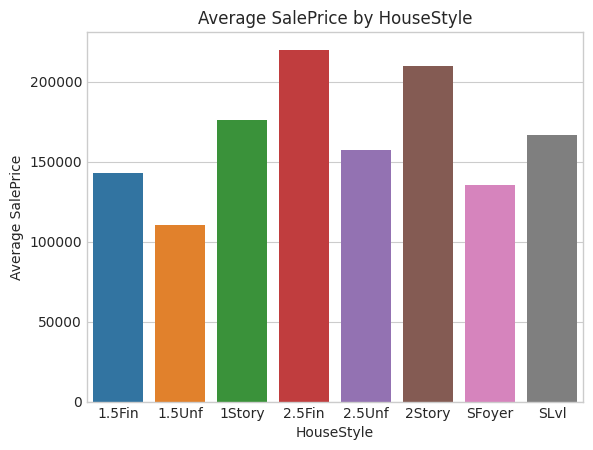

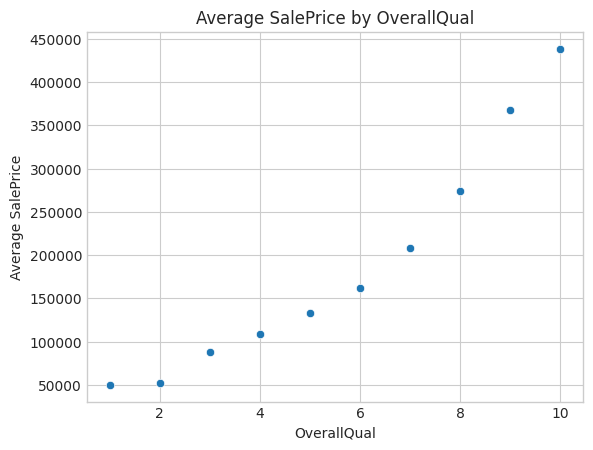

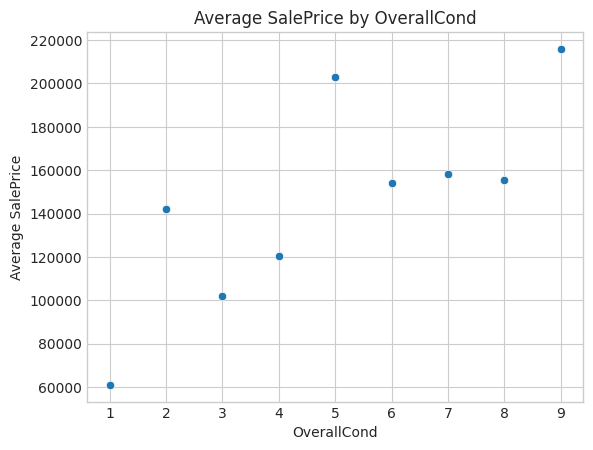

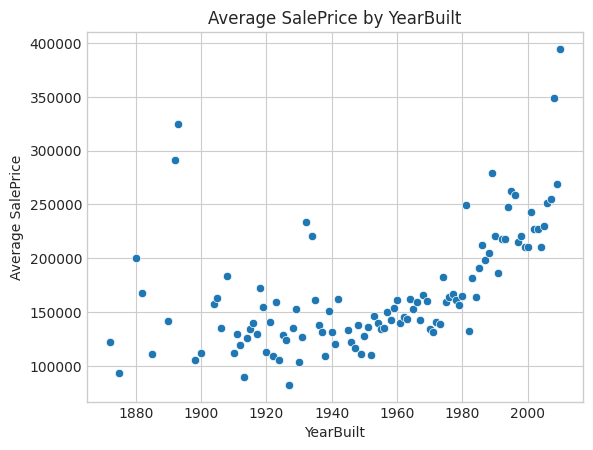

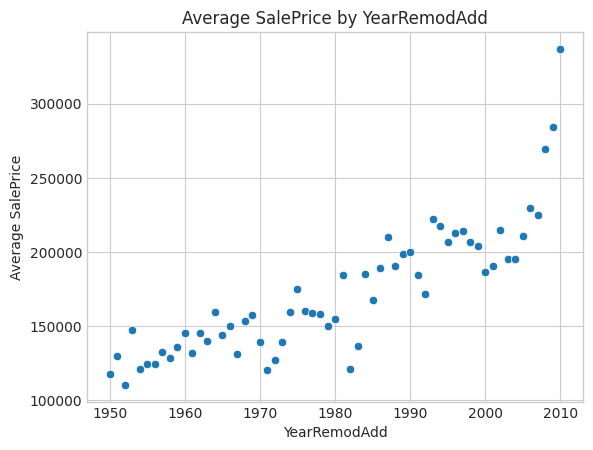

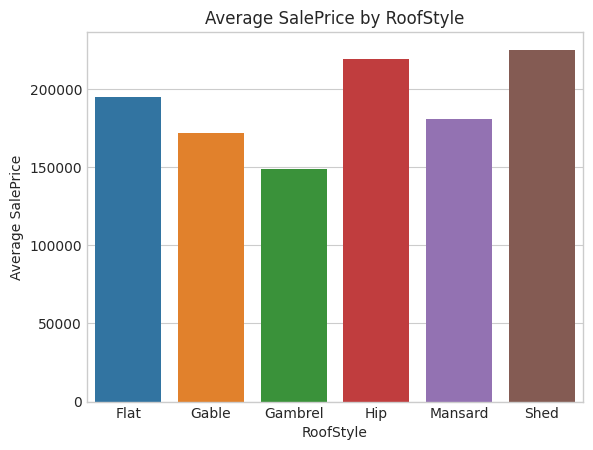

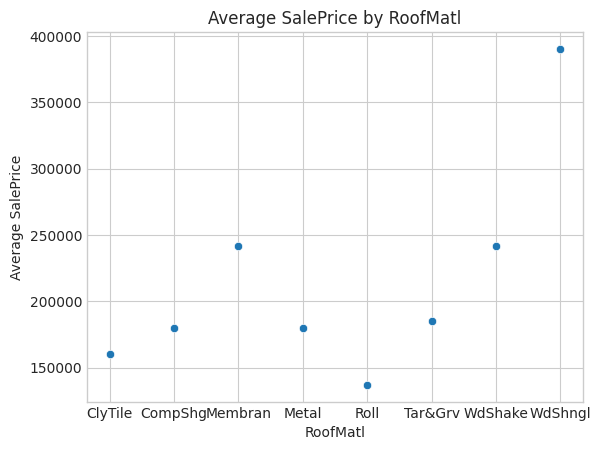

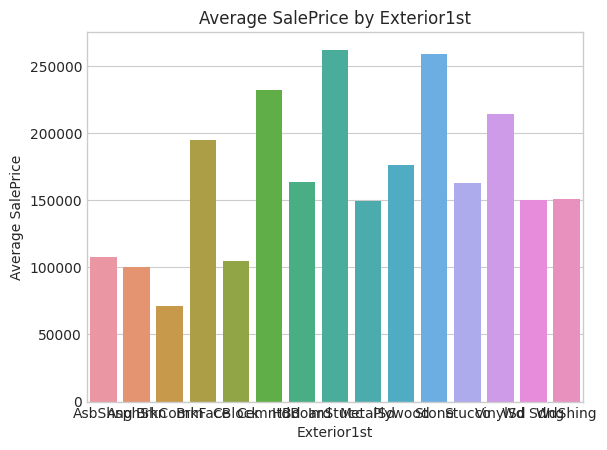

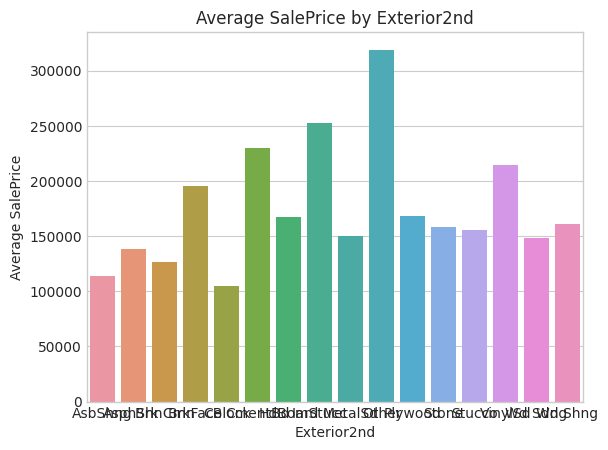

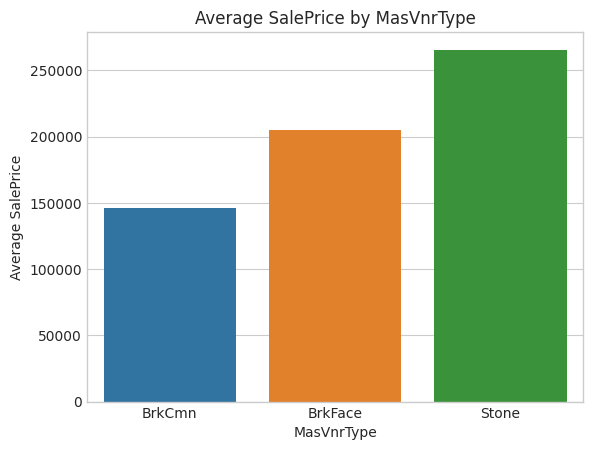

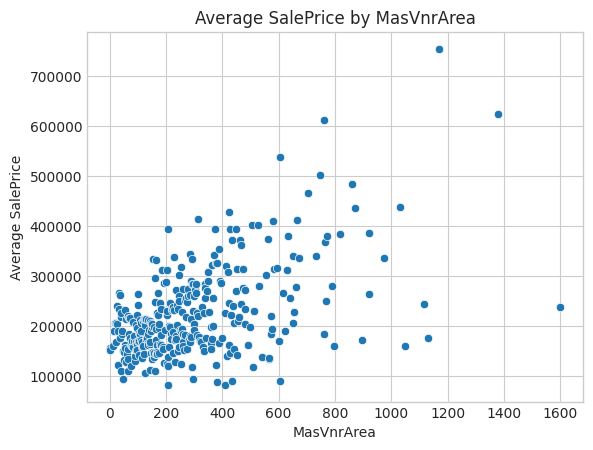

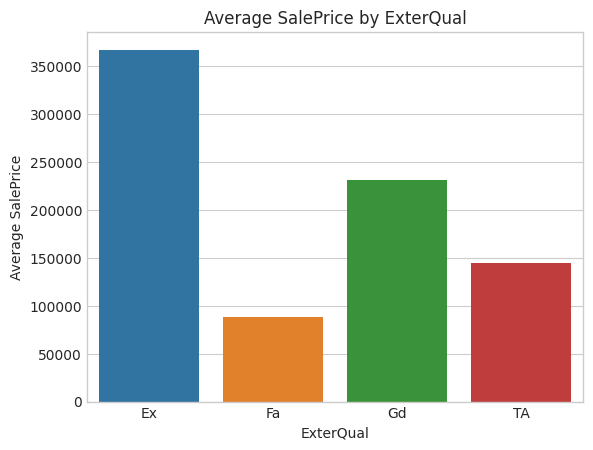

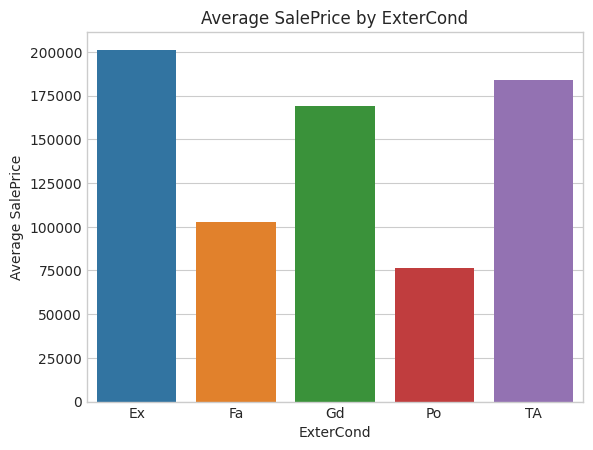

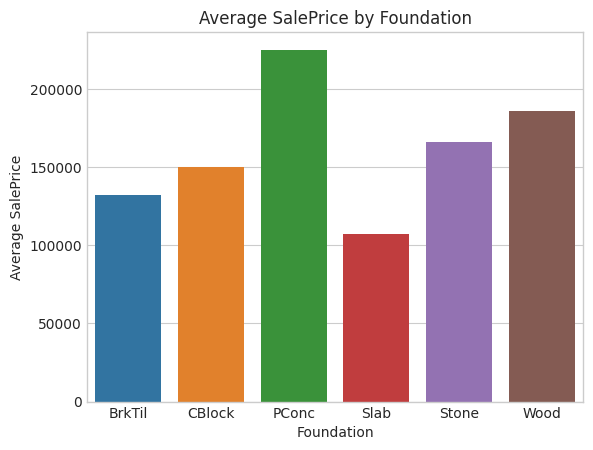

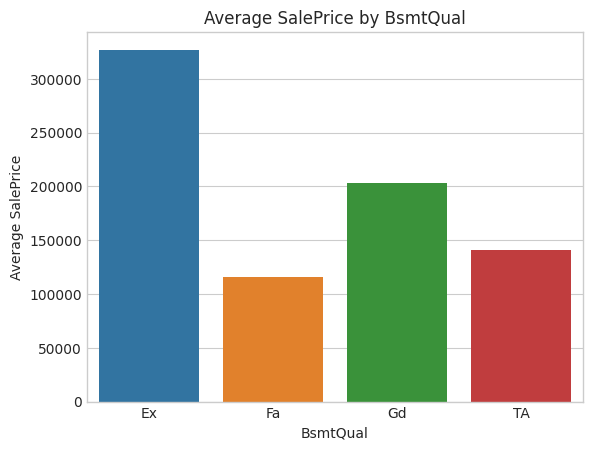

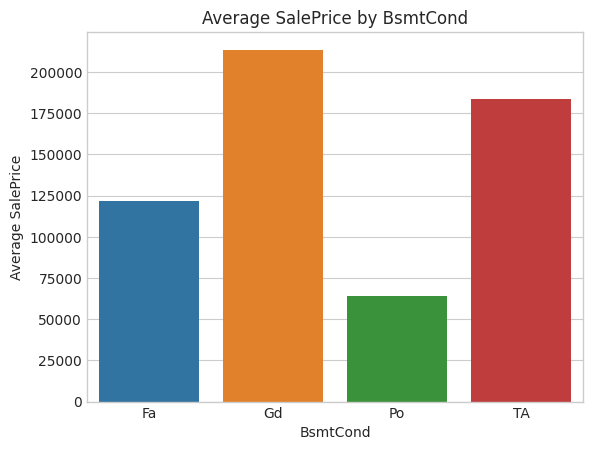

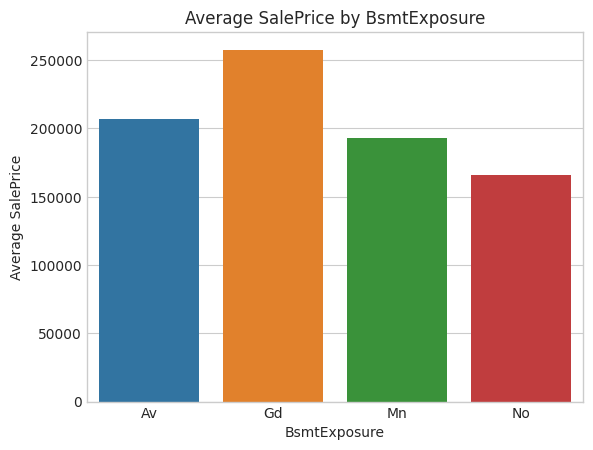

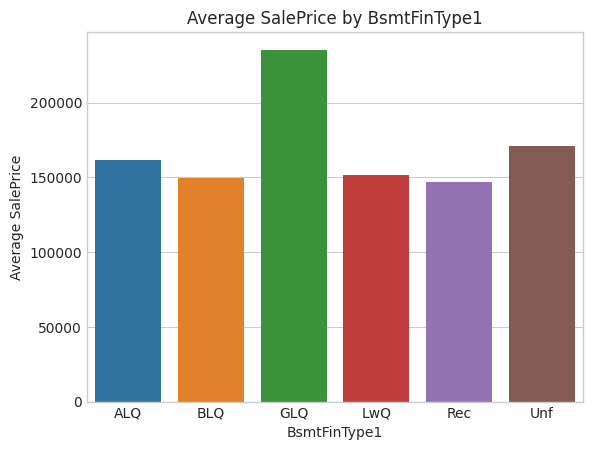

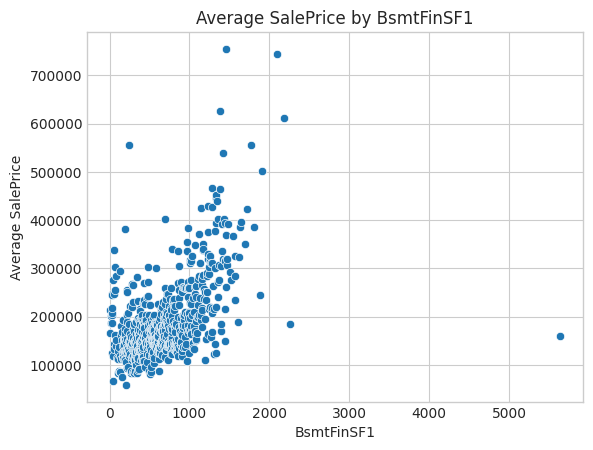

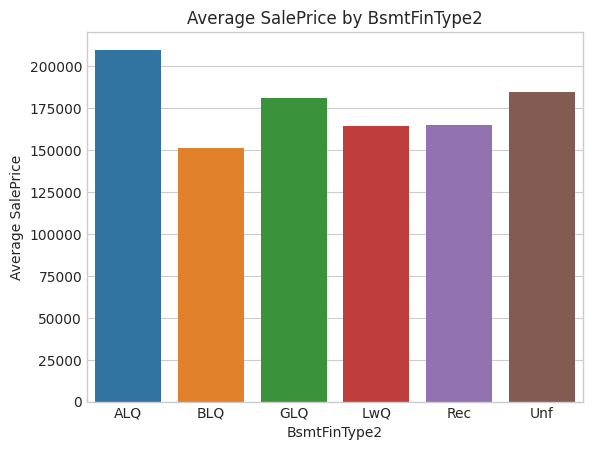

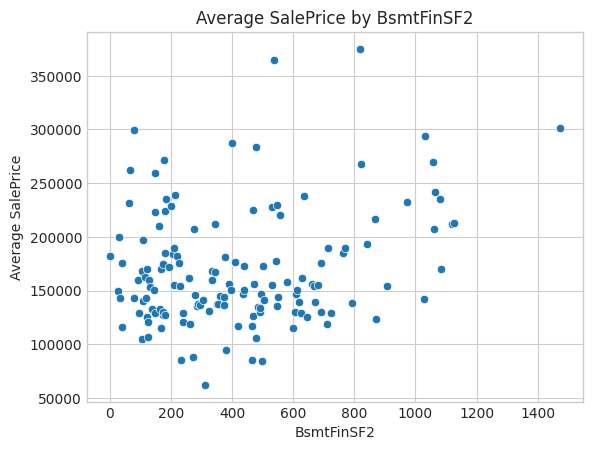

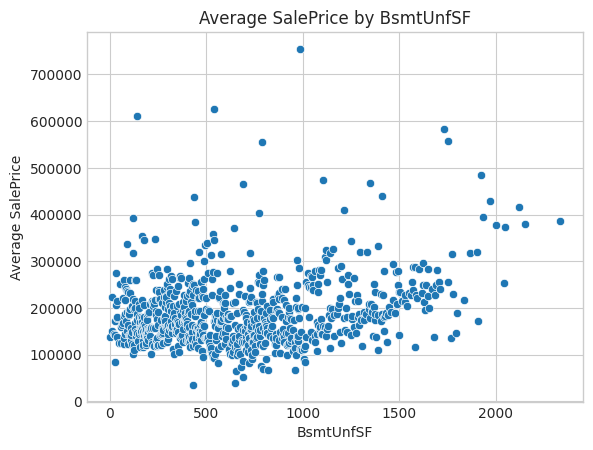

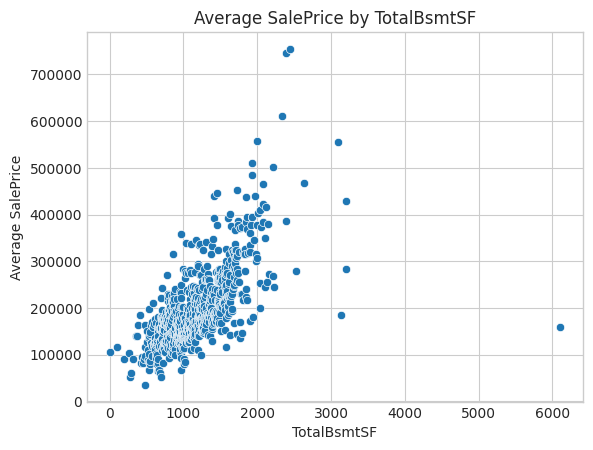

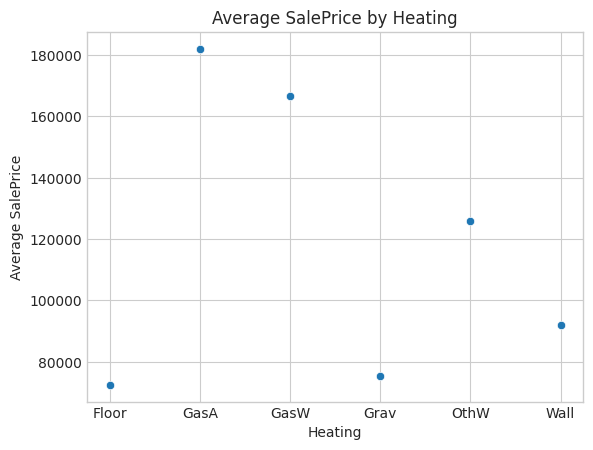

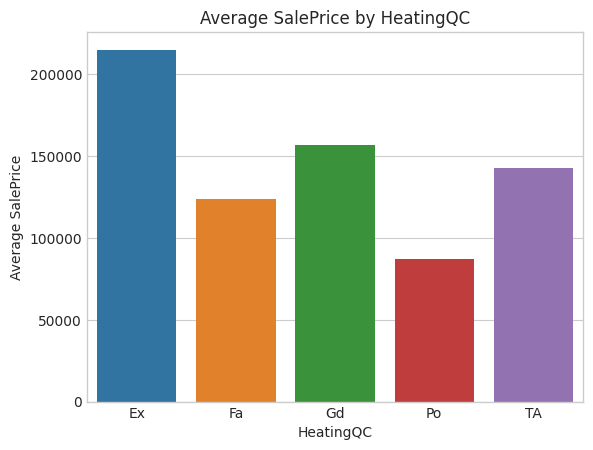

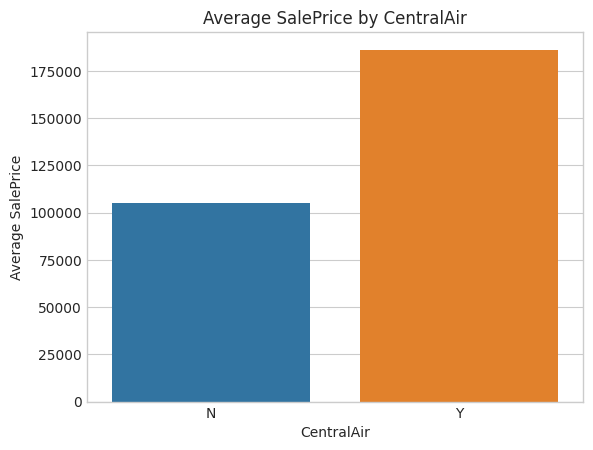

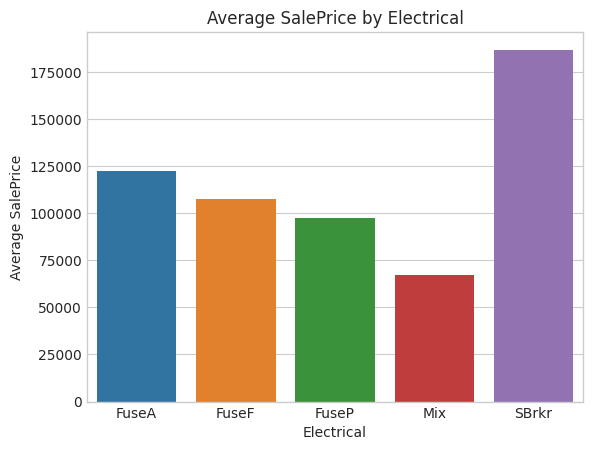

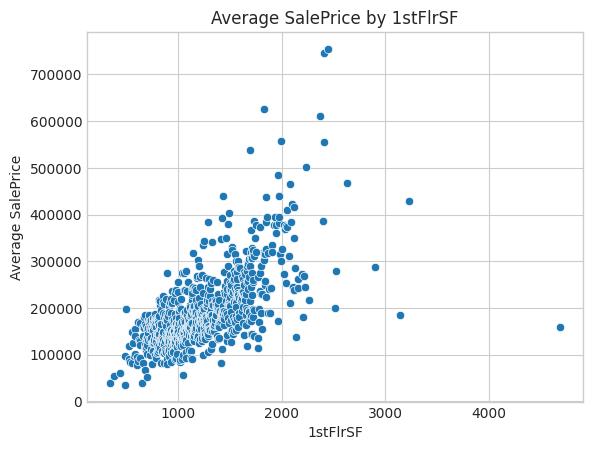

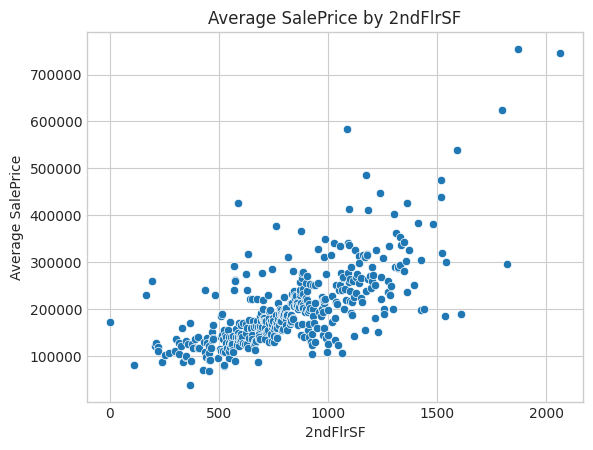

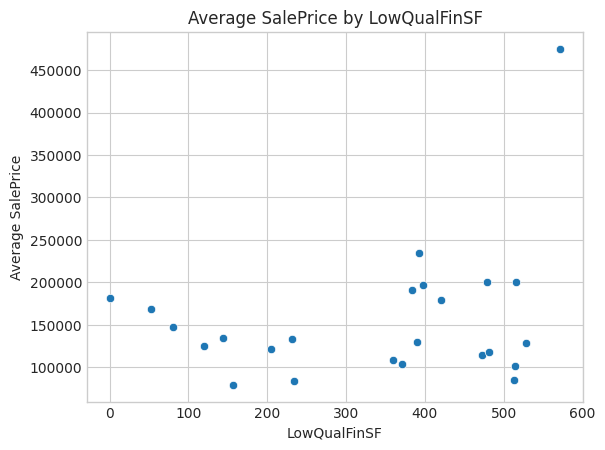

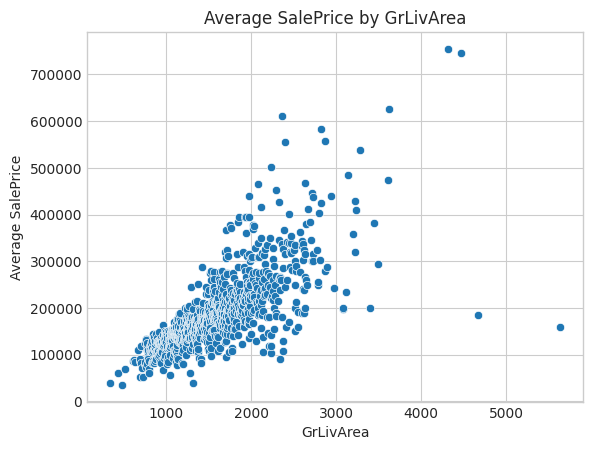

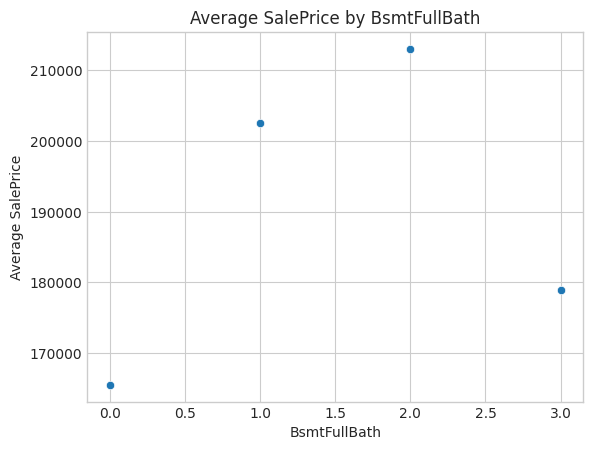

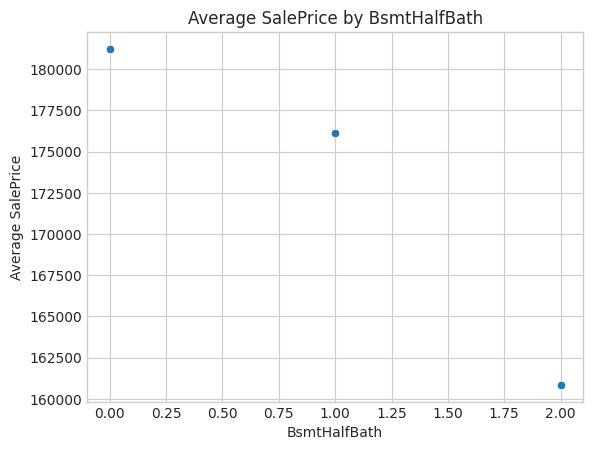

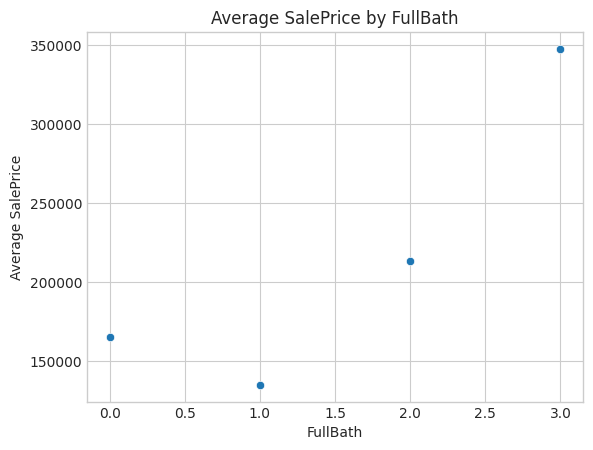

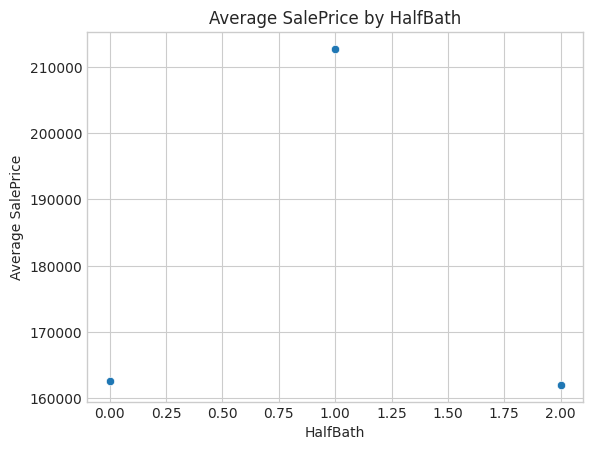

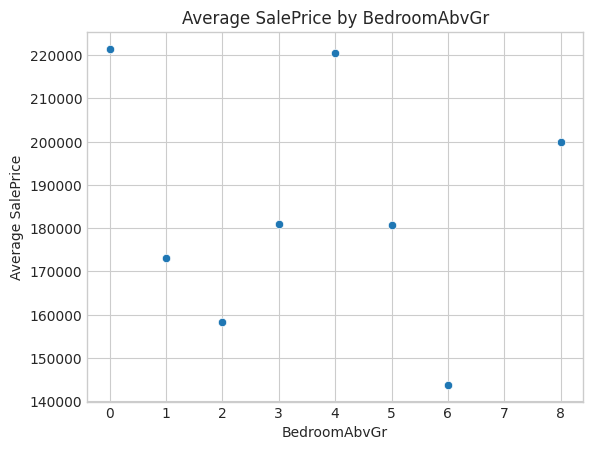

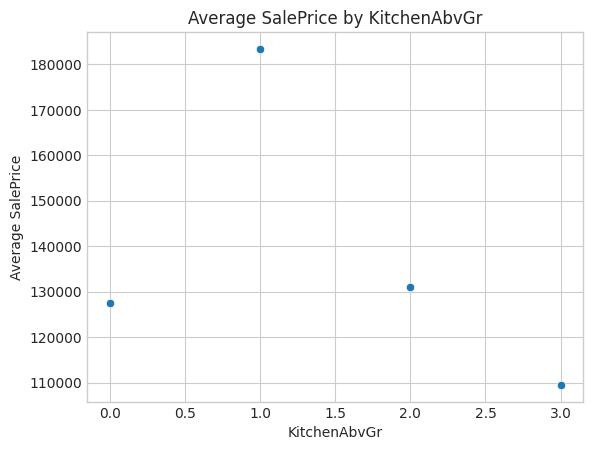

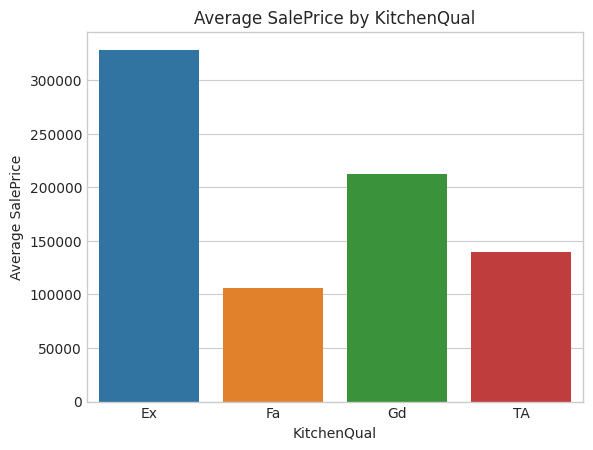

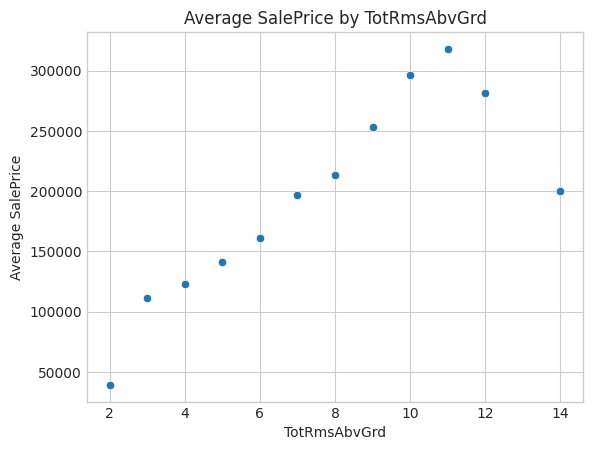

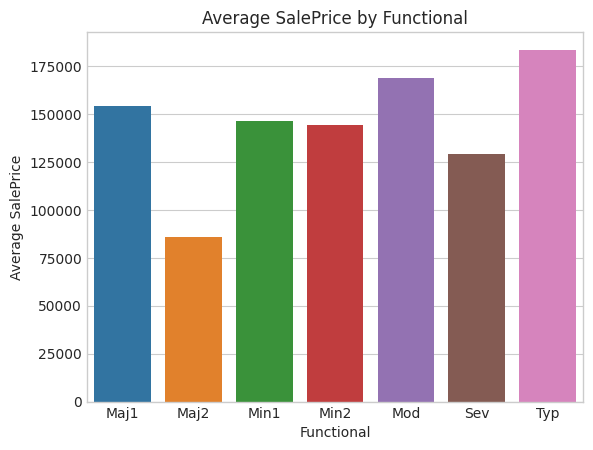

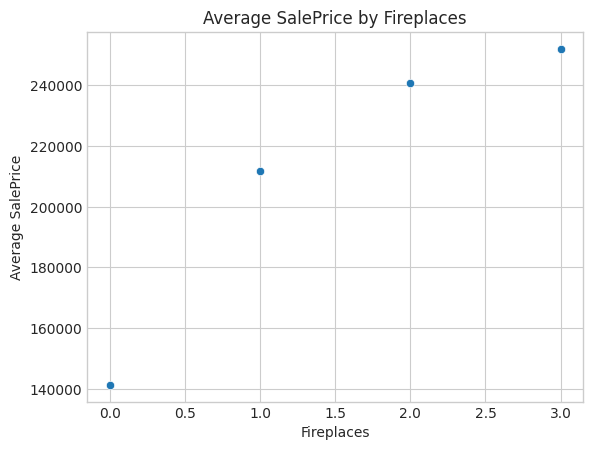

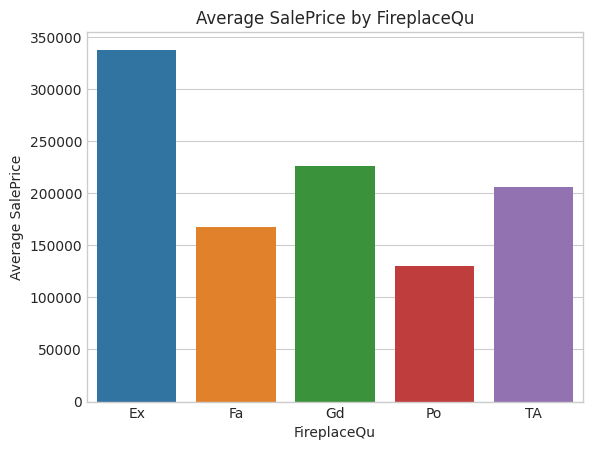

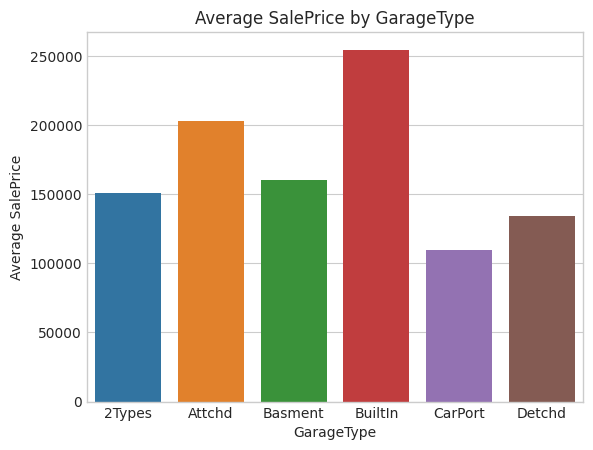

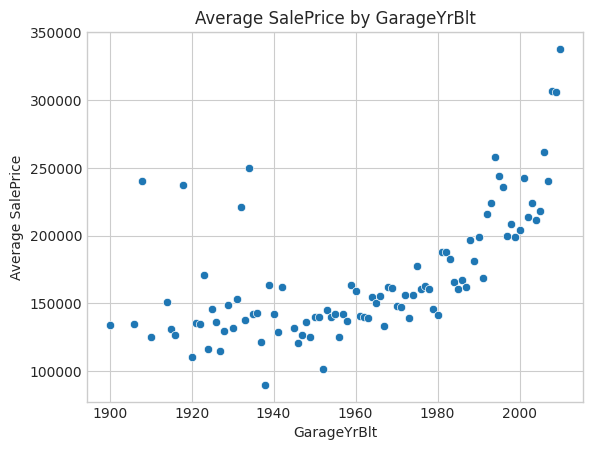

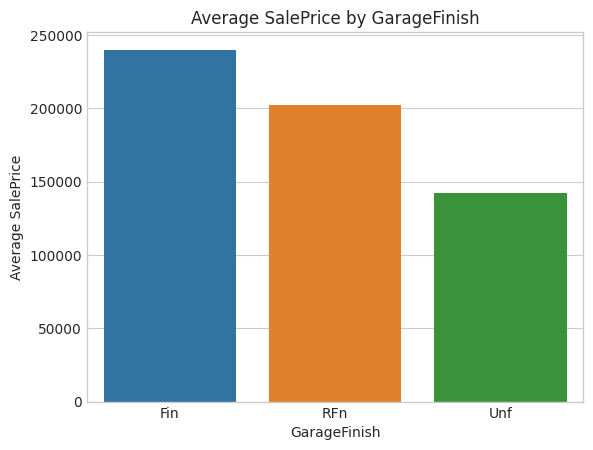

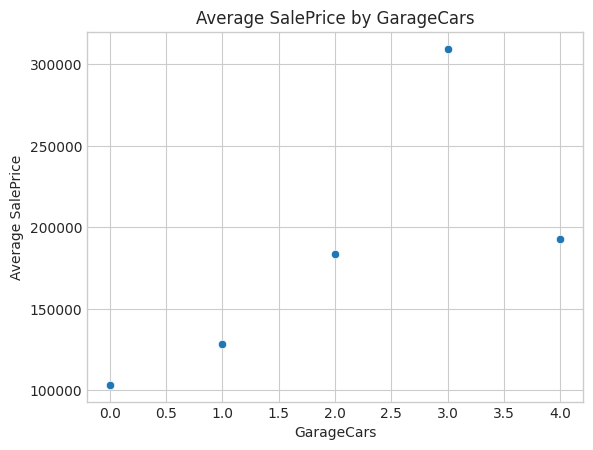

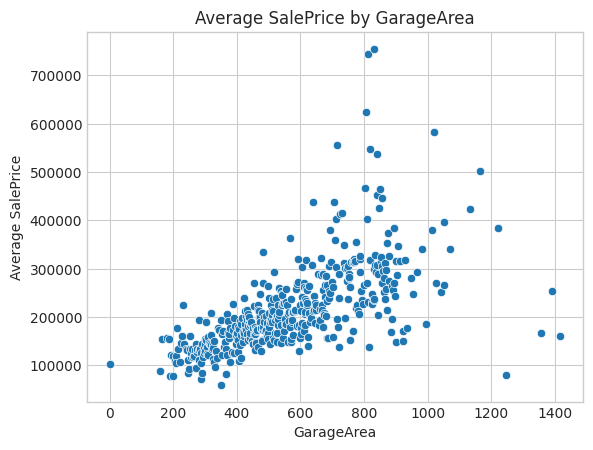

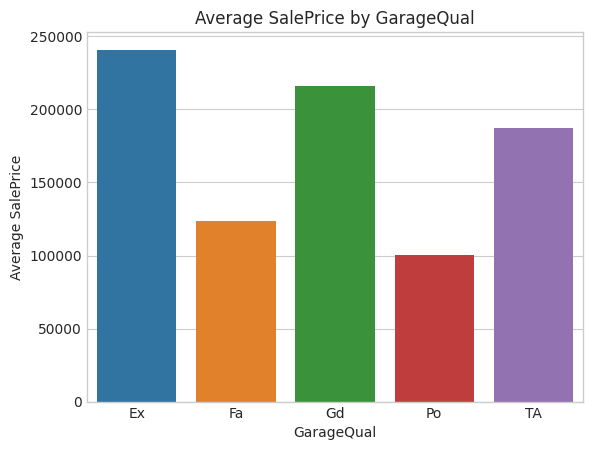

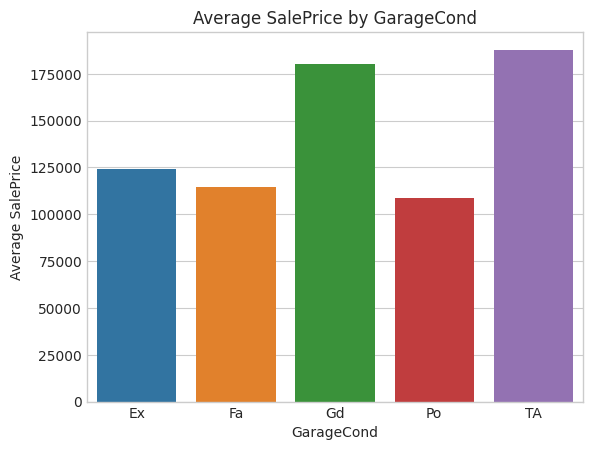

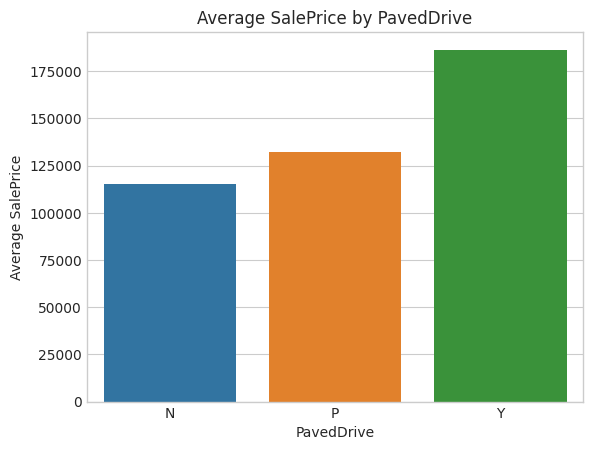

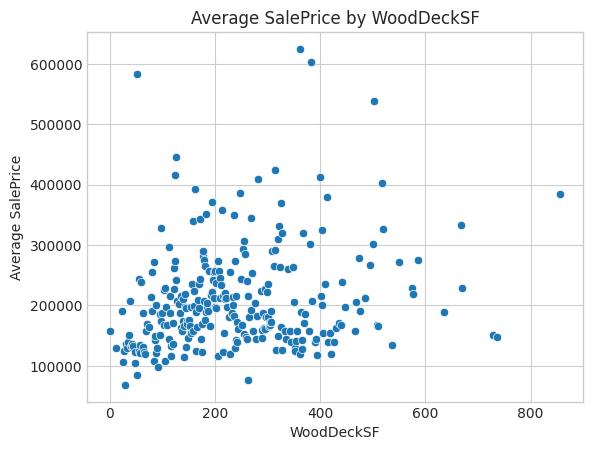

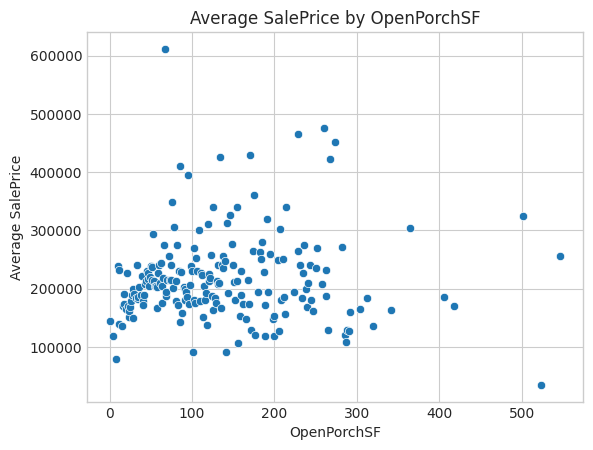

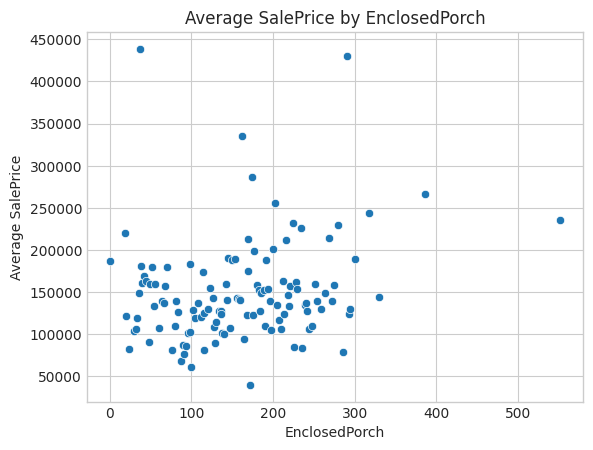

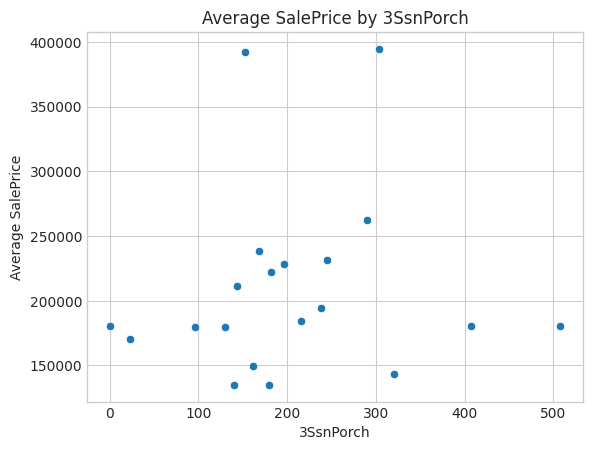

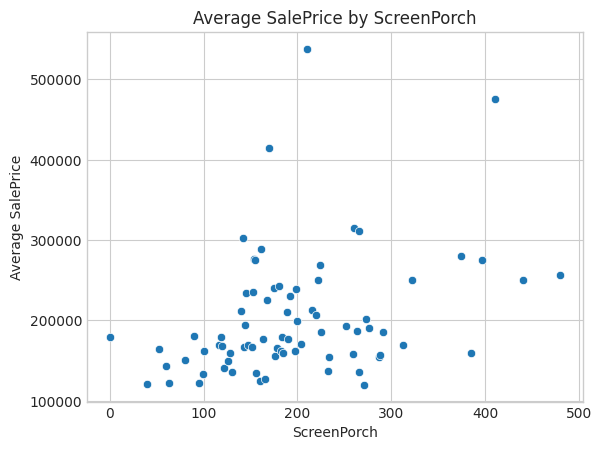

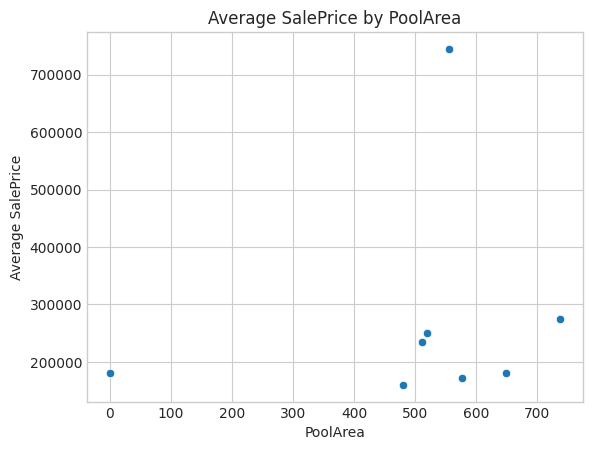

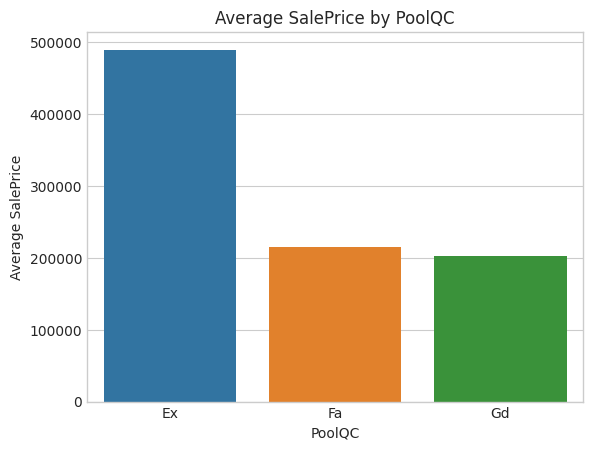

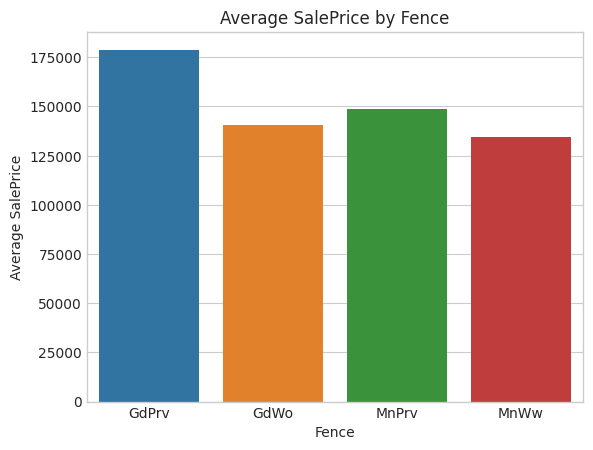

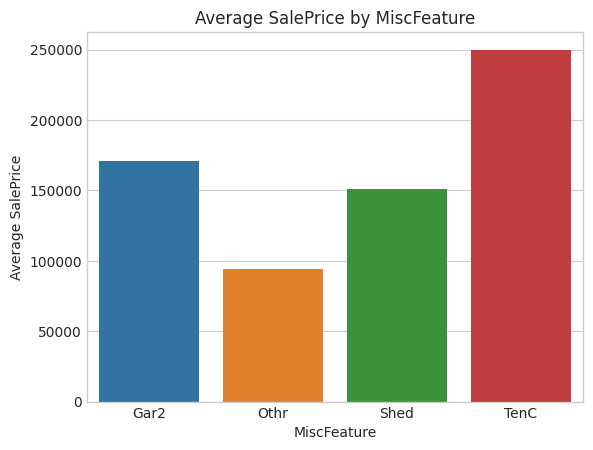

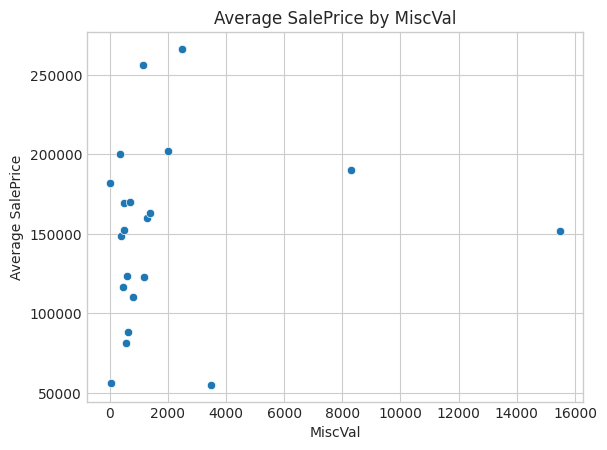

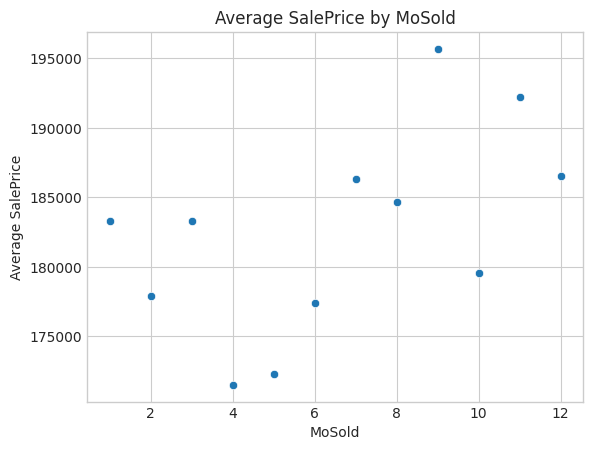

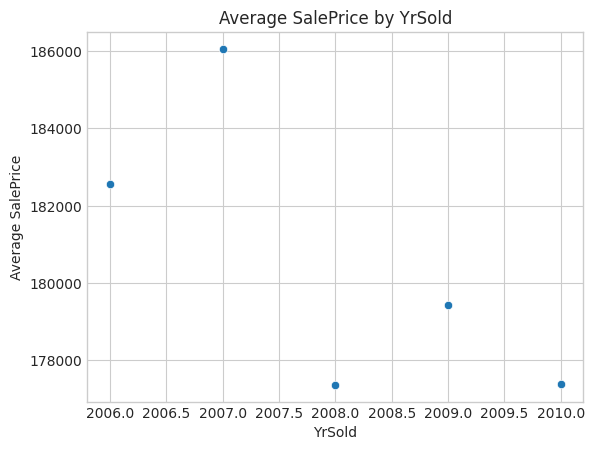

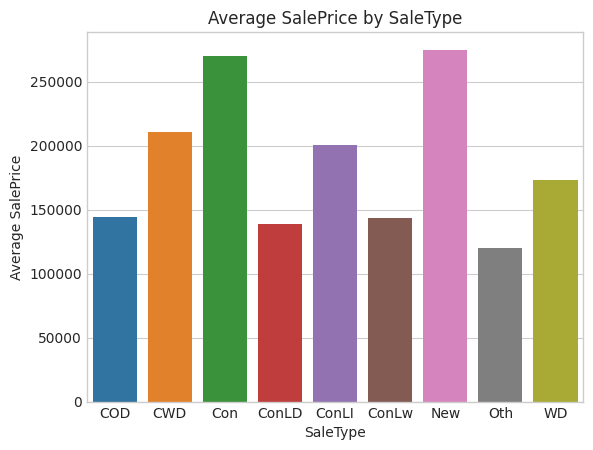

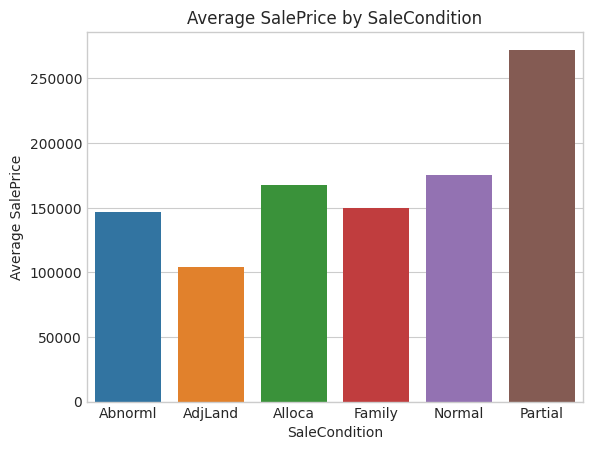

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_column_relation(df, target_col, col_name):

  # Calculate average sales price for each category
  average_sales_price = df.groupby(col_name)[target_col].mean()

  if col_name in df_cat_train.columns:
    # Use bar plot for categorical data
    sns.barplot(x=average_sales_price.keys(), y=average_sales_price)

  else:
    # Use scatter plot for numerical data (consider hue for additional grouping)
    sns.scatterplot(x=average_sales_price.keys(), y=average_sales_price)

  # Customize plot (titles, labels, etc.) based on your needs
  plt.title(f"Average {target_col} by {col_name}")
  plt.xlabel(col_name)
  plt.ylabel(f"Average {target_col}")
  plt.show()

# plot the data 
df = train_df.drop('Id', axis=1)

for col in df.columns:
  if col != 'SalePrice':
    analyze_column_relation(df.copy(), 'SalePrice', col)

# Missing values: Preliminary investigation

- drop the columns or do imputation? Calculate MAE with RF or review a plot
- what data use to fill the misssing values?
    * numeric columns(mean, median)?
    * categorical columns (mode, ordinal enc, one-hot enc)?

In [30]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Function for comparing different approaches
# Root-Mean-Squared-Error (RMSE)
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, preds))
    #return mean_absolute_error(y_valid, preds)
    
from xgboost import XGBRegressor

def score_dataset2(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return np.sqrt(mean_squared_error(y_valid, preds))
    #return mean_absolute_error(y_valid, preds)
    
# Calculate the Normalize Mean Squared Error:
def score_NMSE(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    # Calcular MSE y NMSE
    mse = mean_squared_error(y_valid, preds)
    nmse = mse / np.var(y_valid)
    return nmse

In [63]:
# Review the missing values on NUMERIC columns. 
# Only three columns with nan: LotFrontage, GarageYrBlt and MasVnrArea            
# Review one by one to determine what treatment to perform on each of the columns
df_num_train.isna().sum().sort_values(ascending=False)
#df_num_valid.isna().sum().sort_values(ascending=False)

LotFrontage      212
GarageYrBlt       58
MasVnrArea         6
MSSubClass         0
FullBath           0
MoSold             0
ScreenPorch        0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
GarageArea         0
GarageCars         0
Fireplaces         0
TotRmsAbvGrd       0
BedroomAbvGr       0
HalfBath           0
BsmtFullBath       0
BsmtHalfBath       0
GrLivArea          0
2ndFlrSF           0
1stFlrSF           0
TotalBsmtSF        0
BsmtUnfSF          0
BsmtFinSF2         0
BsmtFinSF1         0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [18]:
# Review the missing values on NUMERIC columns. --> LotFrontage (fill with median), GarageYrBlt (fill with 0) and MasVnrArea (fill with 0)  
#df_num_train.LotFrontage.value_counts().sort_values(ascending=False).head(10)
df_num_train.GarageYrBlt.value_counts().sort_values(ascending=False).head(10)
#df_num_train.MasVnrArea.value_counts().sort_values(ascending=False).head(10)

GarageYrBlt
2005.0    54
2006.0    46
2003.0    42
2004.0    39
2007.0    37
1977.0    30
1998.0    26
1999.0    23
2002.0    23
2008.0    23
Name: count, dtype: int64

# Missing values in NUMERIC data

Median value was using as strategic imputation, MAE score is better than removing columns:
- LotFrontage. Imputation with median. Deleting column did not seem like a solution, since the column seems to make business sense to keep and the volume of missing data, 249/1460=17%, is not very high.
- GarageYrBlt. Imputation with 0. When the value is null it is simply means that we don't have this data. The volume is low, 81/1460=5%. Another option was imputation with the YearBuilt value, or review all the related garage columns.
- MasVnrArea. Imputation with 0. 

In [31]:
# Review the missing values on NUMERIC columns. --> LotFrontage, GarageYrBlt and MasVnrArea
# Imputation or Drop columns? Calculate the MAE

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

X_train = df_num_train.copy()
X_valid = df_num_valid.copy()
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)

print("y_train", y_train.shape)
print("y_valid", y_valid.shape)


# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

print("cols_with_missing", cols_with_missing)

# Drop columns 
# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("RMSE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

# Imputation
col_to_impute_zero = ['GarageYrBlt', 'MasVnrArea']
X_train[col_to_impute_zero] = X_train[col_to_impute_zero].fillna(0)
X_valid[col_to_impute_zero] = X_valid[col_to_impute_zero].fillna(0)    

# Apply to LotFrontage column
my_imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

imputed_X_train.index = X_train.index
imputed_X_valid.index = X_valid.index

print("RMSE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

X_train (1168, 36)
X_valid (292, 36)
y_train (1168,)
y_valid (292,)
cols_with_missing ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
RMSE from Approach 1 (Drop columns with missing values):
34221.23371483575
RMSE from Approach 2 (Imputation):
33018.83610843232


In [32]:
# Review the year cols to standardize them to the current year. New calculated cols are added

now = 2024
imputed_X_train['YearBuilt_norm'] = imputed_X_train['YearBuilt'] / now
imputed_X_train['YearRemodAdd_norm'] = imputed_X_train['YearRemodAdd'] / now
imputed_X_train['GarageYrBlt_norm'] = imputed_X_train['GarageYrBlt'] / now
imputed_X_train['YrSold_norm'] = imputed_X_train['YrSold'] / now

imputed_X_valid['YearBuilt_norm'] = imputed_X_valid['YearBuilt'] / now
imputed_X_valid['YearRemodAdd_norm'] = imputed_X_valid['YearRemodAdd'] / now
imputed_X_valid['GarageYrBlt_norm'] = imputed_X_valid['GarageYrBlt'] / now
imputed_X_valid['YrSold_norm'] = imputed_X_valid['YrSold'] / now

print("imputed_X_train shape {}".format(imputed_X_train.shape))
print("imputed_X_valid shape {}".format(imputed_X_valid.shape))

imputed_X_train shape (1168, 40)
imputed_X_valid shape (292, 40)


# Scaled numeric data

In [33]:
# review the data in case it is necessary to scale it

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
'''
# Standarization: StandardScaler()
# Normalization: MinMaxScaler()
# RobustScaler: RobustScaler()
'''

scaler = RobustScaler()
imputed_X_train_scaled = pd.DataFrame(scaler.fit_transform(imputed_X_train))
imputed_X_valid_scaled = scaler.transform(imputed_X_valid)

# Ajustar el scaler a los datos de entrenamiento
scaler.fit(imputed_X_train)

# Transformar los datos de entrenamiento, validación y prueba
imputed_X_train_scaled = pd.DataFrame(scaler.transform(imputed_X_train), columns=imputed_X_train.columns)
imputed_X_valid_scaled = pd.DataFrame(scaler.transform(imputed_X_valid), columns=imputed_X_valid.columns)

print("imputed_X_train_scaled shape {}".format(imputed_X_train_scaled.shape))
print("imputed_X_valid_scaled shape {}".format(imputed_X_valid_scaled.shape))

imputed_X_train_scaled.index = X_train.index
imputed_X_valid_scaled.index = X_valid.index


imputed_X_train_scaled shape (1168, 40)
imputed_X_valid_scaled shape (292, 40)


# Missing values in CATEGORICAL data

Review the missing values on CATEGORICAL columns. 
Looking at the results: 
* The first six positions have a very high missing values. For now do not delete columns.
* All columns with missing values fill in with their corresponding default values (review the describe data).


In [15]:
df_cat_train.isna().sum().sort_values(ascending=False)

PoolQC           1164
MiscFeature      1119
Alley            1097
Fence             954
MasVnrType        707
FireplaceQu       551
GarageType         58
GarageCond         58
GarageQual         58
GarageFinish       58
BsmtFinType2       29
BsmtFinType1       28
BsmtQual           28
BsmtExposure       28
BsmtCond           28
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

# Next step: Encoding
* **Ordinal encoding.** Some columns (PoolQC, Fence, FireplaceQu and more columns beacuse have sense for ranking data) are fill in with ordinal imputation encoding  --> label_X_oe_train
* **One hot encoding.** Some others (MiscFeature, Alley, MasVnrType) are imputated with one-hot encoding --> OH_cols_train
* PENDING
 - Some columns could be related to each other (Garage, Bsmt). 
 - Rest of the columns, confirm what method use to. They could be grouped by means of a count
Review one by one to determine what treatment to perform on each of the columns

In [34]:
# ORDINAL ENCODING
#   -fill missing values with 0-NA. Columns: PoolQC, Fence, FireplaceQu
#   -apply order encoding

#example to view the distinct values: df_cat.PoolQC.value_counts().sort_values(ascending=False).head(10)

# columns identify to make ordering encoding, beacuse exist ranking values
cols_cat_oe = ['PoolQC', 'Fence', 'FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
                'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtFinType1', 'BsmtFinType2',
                'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtExposure', 'PavedDrive'] 

cols_cat_oe_encoded = [str(i+"_encoded") for i in cols_cat_oe]

# create a temporally df to validate Encoding. Previously, fill default values in categorical data
train_tmp = df_cat_train.copy()
X_train = train_tmp[cols_cat_oe]

valid_tmp = df_cat_valid.copy()
X_valid = valid_tmp[cols_cat_oe]

print("X_train", X_train.shape)
print("X_valid", X_valid.shape)

print("y_train", y_train.shape)
print("y_valid", y_valid.shape)

fill_values = {'GarageCond': 'NA', 'GarageQual': 'NA', 'BsmtFinType2': 'NA', 
                   'BsmtExposure': 'NA','BsmtFinType1': 'NA','BsmtQual': 'NA','BsmtCond': 'NA',
                   'PoolQC': 'NA', 'Fence': 'NA', 'FireplaceQu': 'NA'}

X_train.fillna(fill_values, inplace=True)
X_valid.fillna(fill_values, inplace=True)

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply OrdinalEncoder in categorical data beacuse exists ranking to the categories
from sklearn.preprocessing import OrdinalEncoder

PoolQC_categories = [['NA', 'Fa', 'TA', 'Gd', 'Ex']]
Fence_categories = [['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']]
other_categories = [['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']] # FireplaceQu, BsmtQual, BsmtCond, GarageQual, GarageCond
other2_categories = [['Po', 'Fa', 'TA', 'Gd', 'Ex']] # ExterQual, ExterCond, HeatingQC, KitchenQual
other3_categories = [['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']] # BsmtFinType1, BsmtFinType2
LotShape_categories = [['IR3', 'IR2', 'IR1', 'Reg']]
LandContour_categories = [['Low', 'HLS', 'Bnk', 'Lvl']]     
Utilities_categories = [['ELO', 'NoSeWa', 'NoSewr', 'AllPub']]
LandSlope_categories = [['Sev', 'Mod', 'Gtl']]
BsmtExposure_categories = [['NA', 'No', 'Mn', 'Av', 'Gd']]
PavedDrive_categories = [['N', 'P', 'Y']]

enc1 = OrdinalEncoder(categories=PoolQC_categories)
label_X_train['PoolQC_encoded'] = enc1.fit_transform(X_train[['PoolQC']])
label_X_valid['PoolQC_encoded'] = enc1.transform(X_valid[['PoolQC']])

enc2 = OrdinalEncoder(categories=Fence_categories)
label_X_train['Fence_encoded'] = enc2.fit_transform(X_train[['Fence']])
label_X_valid['Fence_encoded'] = enc2.transform(X_valid[['Fence']])

enc3 = OrdinalEncoder(categories=other_categories)
label_X_train['FireplaceQu_encoded'] = enc3.fit_transform(X_train[['FireplaceQu']])
label_X_valid['FireplaceQu_encoded'] = enc3.transform(X_valid[['FireplaceQu']])
label_X_train['BsmtQual_encoded'] = enc3.fit_transform(X_train[['BsmtQual']])
label_X_valid['BsmtQual_encoded'] = enc3.transform(X_valid[['BsmtQual']]) 
label_X_train['BsmtCond_encoded'] = enc3.fit_transform(X_train[['BsmtCond']])
label_X_valid['BsmtCond_encoded'] = enc3.transform(X_valid[['BsmtCond']])
label_X_train['GarageQual_encoded'] = enc3.fit_transform(X_train[['GarageQual']])
label_X_valid['GarageQual_encoded'] = enc3.transform(X_valid[['GarageQual']])
label_X_train['GarageCond_encoded'] = enc3.fit_transform(X_train[['GarageCond']])
label_X_valid['GarageCond_encoded'] = enc3.transform(X_valid[['GarageCond']])

enc4 = OrdinalEncoder(categories=other2_categories)
label_X_train['ExterQual_encoded'] = enc4.fit_transform(X_train[['ExterQual']])
label_X_valid['ExterQual_encoded'] = enc4.transform(X_valid[['ExterQual']])
label_X_train['ExterCond_encoded'] = enc4.fit_transform(X_train[['ExterCond']])
label_X_valid['ExterCond_encoded'] = enc4.transform(X_valid[['ExterCond']])
label_X_train['HeatingQC_encoded'] = enc4.fit_transform(X_train[['HeatingQC']])
label_X_valid['HeatingQC_encoded'] = enc4.transform(X_valid[['HeatingQC']])
label_X_train['KitchenQual_encoded'] = enc4.fit_transform(X_train[['KitchenQual']])
label_X_valid['KitchenQual_encoded'] = enc4.transform(X_valid[['KitchenQual']])

enc5 = OrdinalEncoder(categories=other3_categories)
label_X_train['BsmtFinType1_encoded'] = enc5.fit_transform(X_train[['BsmtFinType1']])
label_X_valid['BsmtFinType1_encoded'] = enc5.transform(X_valid[['BsmtFinType1']])
label_X_train['BsmtFinType2_encoded'] = enc5.fit_transform(X_train[['BsmtFinType2']])
label_X_valid['BsmtFinType2_encoded'] = enc5.transform(X_valid[['BsmtFinType2']])

enc6 = OrdinalEncoder(categories=LotShape_categories)
label_X_train['LotShape_encoded'] = enc6.fit_transform(X_train[['LotShape']])
label_X_valid['LotShape_encoded'] = enc6.transform(X_valid[['LotShape']])
enc7 = OrdinalEncoder(categories=LandContour_categories)
label_X_train['LandContour_encoded'] = enc7.fit_transform(X_train[['LandContour']])
label_X_valid['LandContour_encoded'] = enc7.transform(X_valid[['LandContour']])
enc8 = OrdinalEncoder(categories=Utilities_categories)
label_X_train['Utilities_encoded'] = enc8.fit_transform(X_train[['Utilities']])
label_X_valid['Utilities_encoded'] = enc8.transform(X_valid[['Utilities']])
enc9 = OrdinalEncoder(categories=LandSlope_categories)
label_X_train['LandSlope_encoded'] = enc9.fit_transform(X_train[['LandSlope']])
label_X_valid['LandSlope_encoded'] = enc9.transform(X_valid[['LandSlope']])
enc10 = OrdinalEncoder(categories=BsmtExposure_categories)
label_X_train['BsmtExposure_encoded'] = enc10.fit_transform(X_train[['BsmtExposure']])
label_X_valid['BsmtExposure_encoded'] = enc10.transform(X_valid[['BsmtExposure']])
enc11 = OrdinalEncoder(categories=PavedDrive_categories)
label_X_train['PavedDrive_encoded'] = enc11.fit_transform(X_train[['PavedDrive']])
label_X_valid['PavedDrive_encoded'] = enc11.transform(X_valid[['PavedDrive']])


# example for print the distinct values
#for i in cols_cat_oe_encoded:
#    print("X_train:", X_train[i].value_counts().sort_values(ascending=False).head(10))
#    print("X_valid:", X_valid[i].value_counts().sort_values(ascending=False).head(10))


#Drop categorical columns and only mantain columns with order encoding 
label_X_oe_train = pd.DataFrame(label_X_train[cols_cat_oe_encoded])
label_X_oe_valid = pd.DataFrame(label_X_valid[cols_cat_oe_encoded])

print("RMSE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_oe_train, label_X_oe_valid, y_train, y_valid))


X_train (1168, 19)
X_valid (292, 19)
y_train (1168,)
y_valid (292,)
RMSE from Approach 2 (Ordinal Encoding):
50903.74297376854


/tmp/ipykernel_33/2095586206.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(fill_values, inplace=True)
/tmp/ipykernel_33/2095586206.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid.fillna(fill_values, inplace=True)


In [35]:
#Starting from df_cat_train, substract order encoding columns to generate the list of columns to fill with oh-encoding 
cat_cols = list(df_cat_train.columns)

cols_cat_ohe = list(set(cat_cols) - set(cols_cat_oe))
#print("cols_cat_ohe", cols_cat_ohe)


In [36]:
# ONE-HOT ENCODING 
#   -fill missing values with 0-NA. Columns: MiscFeature, Alley, MasVnrType
#   -apply one hot encoding

#example to view the distinct values: df_cat.MiscFeature.value_counts().sort_values(ascending=False).head(10)


# create a temporally df to validate OHEncoder. Previously, fill default values in categorical data
train_tmp2 = df_cat_train.copy()
X_train = train_tmp2[cols_cat_ohe]

valid_tmp2 = df_cat_valid.copy()
X_valid = valid_tmp2[cols_cat_ohe]

print("X_train", X_train.shape)
print("X_valid", X_valid.shape)

#print("X_train muestra", X_train.head())

print("y_train", y_train.shape)
print("y_valid", y_valid.shape)

fill_values ={'GarageType': 'NA','GarageFinish': 'NA','Electrical': 'Mix',
                    'MiscFeature': 'NA', 'Alley': 'NA', 'MasVnrType': 'None'}

X_train.fillna(fill_values, inplace=True)
X_valid.fillna(fill_values, inplace=True)

# Make copy to avoid changing original data 
OH_cols_train = X_train.copy()
OH_cols_valid = X_valid.copy()

# Apply OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cols_cat_ohe]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[cols_cat_ohe]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
#num_X_train = X_train.drop(cat_cols, axis=1)
#num_X_valid = X_valid.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
#OH_X_train = pd.concat([X_train, OH_cols_train], axis=1)
#OH_X_valid = pd.concat([X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_cols_train.columns = OH_cols_train.columns.astype(str)
OH_cols_valid.columns = OH_cols_valid.columns.astype(str)

print("OH_cols_train shape {}".format(OH_cols_train.shape))
print("OH_cols_valid shape {}".format(OH_cols_valid.shape))

print("RMSE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_cols_train, OH_cols_valid, y_train, y_valid))

X_train (1168, 24)
X_valid (292, 24)
y_train (1168,)
y_valid (292,)
OH_cols_train shape (1168, 171)
OH_cols_valid shape (292, 171)
RMSE from Approach 3 (One-Hot Encoding):
48326.50976954521


/tmp/ipykernel_33/3843099919.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(fill_values, inplace=True)
/tmp/ipykernel_33/3843099919.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid.fillna(fill_values, inplace=True)


# Calculate RMSE: 
## with all preprocesed data

In [37]:
# Calculate RMSE with All data, NUMERIC and CATEGORICAL(oe, ohe) data

#print("imputed_X_train shape {}".format(imputed_X_train.shape))
#print("imputed_X_valid shape {}".format(imputed_X_valid.shape))

#print("label_X_oe_train shape {}".format(label_X_oe_train.shape))
#print("label_X_oe_valid shape {}".format(label_X_oe_valid.shape))

#print("OH_cols_train shape {}".format(OH_cols_train.shape))
#print("OH_cols_valid shape {}".format(OH_cols_valid.shape))

# All index must match. X_train.index = imputed_X_train.index = df_cat_oe_train.index = OH_cols_train.index
all_X_train = pd.concat([imputed_X_train, label_X_oe_train, OH_cols_train], axis=1)  
all_X_valid = pd.concat([imputed_X_valid, label_X_oe_valid, OH_cols_valid], axis=1) 

#all_X_train = pd.concat([imputed_X_train_scaled, label_X_oe_train, OH_cols_train], axis=1)  
#all_X_valid = pd.concat([imputed_X_valid_scaled, label_X_oe_valid, OH_cols_valid], axis=1) 

print("all_X_train shape {}".format(all_X_train.shape))
print("all_X_valid shape {}".format(all_X_valid.shape))

print("RMSE from Approach 4 (all data):") 
print(score_dataset(all_X_train, all_X_valid, y_train, y_valid))

print("NMSE Error Cuadrático Medio Normalizado:")
print(score_NMSE(all_X_train, all_X_valid, y_train, y_valid))


all_X_train shape (1168, 230)
all_X_valid shape (292, 230)
RMSE from Approach 4 (all data):
33564.01214656751
NMSE Error Cuadrático Medio Normalizado:
0.15130168776461472


## with selected preprocesed data

In [38]:
#columns_x = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'YearBuilt', '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'FullBath']
columns_x = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'YearBuilt_norm', '1stFlrSF', 'BsmtQual_encoded', 'ExterQual_encoded', 'KitchenQual_encoded']

#Deleting some cols and including some encoding cols the model generates better scores. 

sel_X_train = all_X_train[columns_x] 
sel_X_train.head(3)

sel_X_valid = all_X_valid[columns_x] 

print("sel_X_train shape {}".format(sel_X_train.shape))
print("sel_X_valid shape {}".format(sel_X_valid.shape))

print("RMSE from Approach 4 (select data):") 
print(score_dataset(sel_X_train, sel_X_valid, y_train, y_valid))

print("NMSE Error Cuadrático Medio Normalizado:")
print(score_NMSE(sel_X_train, sel_X_valid, y_train, y_valid))


sel_X_train shape (1168, 10)
sel_X_valid shape (292, 10)
RMSE from Approach 4 (select data):
34398.25818703564
NMSE Error Cuadrático Medio Normalizado:
0.1350035383744068


In [71]:

imputed_X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YearBuilt_norm,YearRemodAdd_norm,GarageYrBlt_norm,YrSold_norm
618,20.0,90.0,11694.0,9.0,5.0,2007.0,2007.0,452.0,48.0,0.0,1774.0,1822.0,1828.0,0.0,0.0,1828.0,0.0,0.0,2.0,0.0,3.0,1.0,9.0,1.0,2007.0,3.0,774.0,0.0,108.0,0.0,0.0,260.0,0.0,0.0,7.0,2007.0,0.991601,0.991601,0.991601,0.991601
870,20.0,60.0,6600.0,5.0,5.0,1962.0,1962.0,0.0,0.0,0.0,894.0,894.0,894.0,0.0,0.0,894.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1962.0,1.0,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,0.969368,0.969368,0.969368,0.992589
92,30.0,80.0,13360.0,5.0,7.0,1921.0,2006.0,0.0,713.0,0.0,163.0,876.0,964.0,0.0,0.0,964.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1921.0,2.0,432.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,8.0,2009.0,0.949111,0.991107,0.949111,0.992589
817,20.0,69.0,13265.0,8.0,5.0,2002.0,2002.0,148.0,1218.0,0.0,350.0,1568.0,1689.0,0.0,0.0,1689.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,2002.0,3.0,857.0,150.0,59.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0,0.989130,0.989130,0.989130,0.992095
302,20.0,118.0,13704.0,7.0,5.0,2001.0,2002.0,150.0,0.0,0.0,1541.0,1541.0,1541.0,0.0,0.0,1541.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,2001.0,3.0,843.0,468.0,81.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,0.988636,0.989130,0.988636,0.991107


# Generate model and make predictions
And generate the output file (submission.csv)

In [89]:
# Option1. Apply RandomForestRegressor with 100 n_estimators, 
# with no scaled data and included Id column in numeric data: score: 0.17258
model = RandomForestRegressor(n_estimators=100, random_state=0)
#model.fit(all_X_train, y_train)
model.fit(sel_X_train, y_train)  # with select data: New best score (v13): 0.16400

# Option2. Apply XGBRegressor, worst score: 0.18417
#model = XGBRegressor()
#model.fit(all_X_train, y_train) # with all data
#model.fit(sel_X_train, y_train) # with select data: score (v12): 0.16953

X_test = test_df.drop(['Id'], axis=1)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test.columns = X_test.columns.astype(str).str.replace('[^\w\s]', '', regex=True)

#train_columns = list(all_X_train.columns)
train_columns = list(sel_X_train.columns)

# review if the train columns exist in test data
X_test = X_test.reindex(columns=train_columns, fill_value=0)

X_test = X_test[train_columns]
X_test = X_test.fillna(X_test.median())


# predictions
predictions = model.predict(X_test)


# output DataFrame
output = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': predictions})
output.to_csv('submission.csv', index=False)
print(output.head())

for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

     Id  SalePrice
0  1461  104407.11
1  1462  121172.10
2  1463  121450.75
3  1464  144683.58
4  1465  206892.00
/kaggle/working/submission.csv


# Cross Validation

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

X = all_X_train
y = y_train

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=100,
                                                              random_state=0))
                             ])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error') # 'neg_mean_squared_error'

print("MAE score:\n", scores.mean())




MAE score:
 17628.188010491176


# Mutual Information
Previously, review the missing values

/tmp/ipykernel_33/3081821015.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


OverallQual         0.555914
GrLivArea           0.485257
TotalBsmtSF         0.397886
GarageArea          0.390397
GarageCars          0.385322
YearBuilt           0.367218
YearBuilt_norm      0.364303
1stFlrSF            0.328379
GarageYrBlt         0.286220
GarageYrBlt_norm    0.283915
Name: MI Scores, dtype: float64


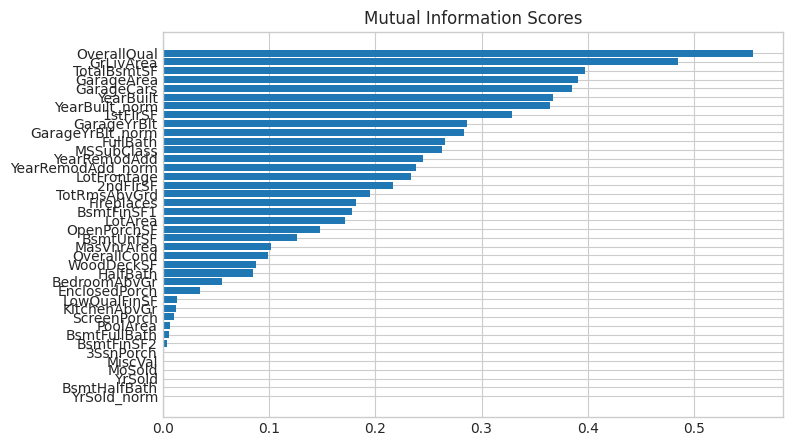

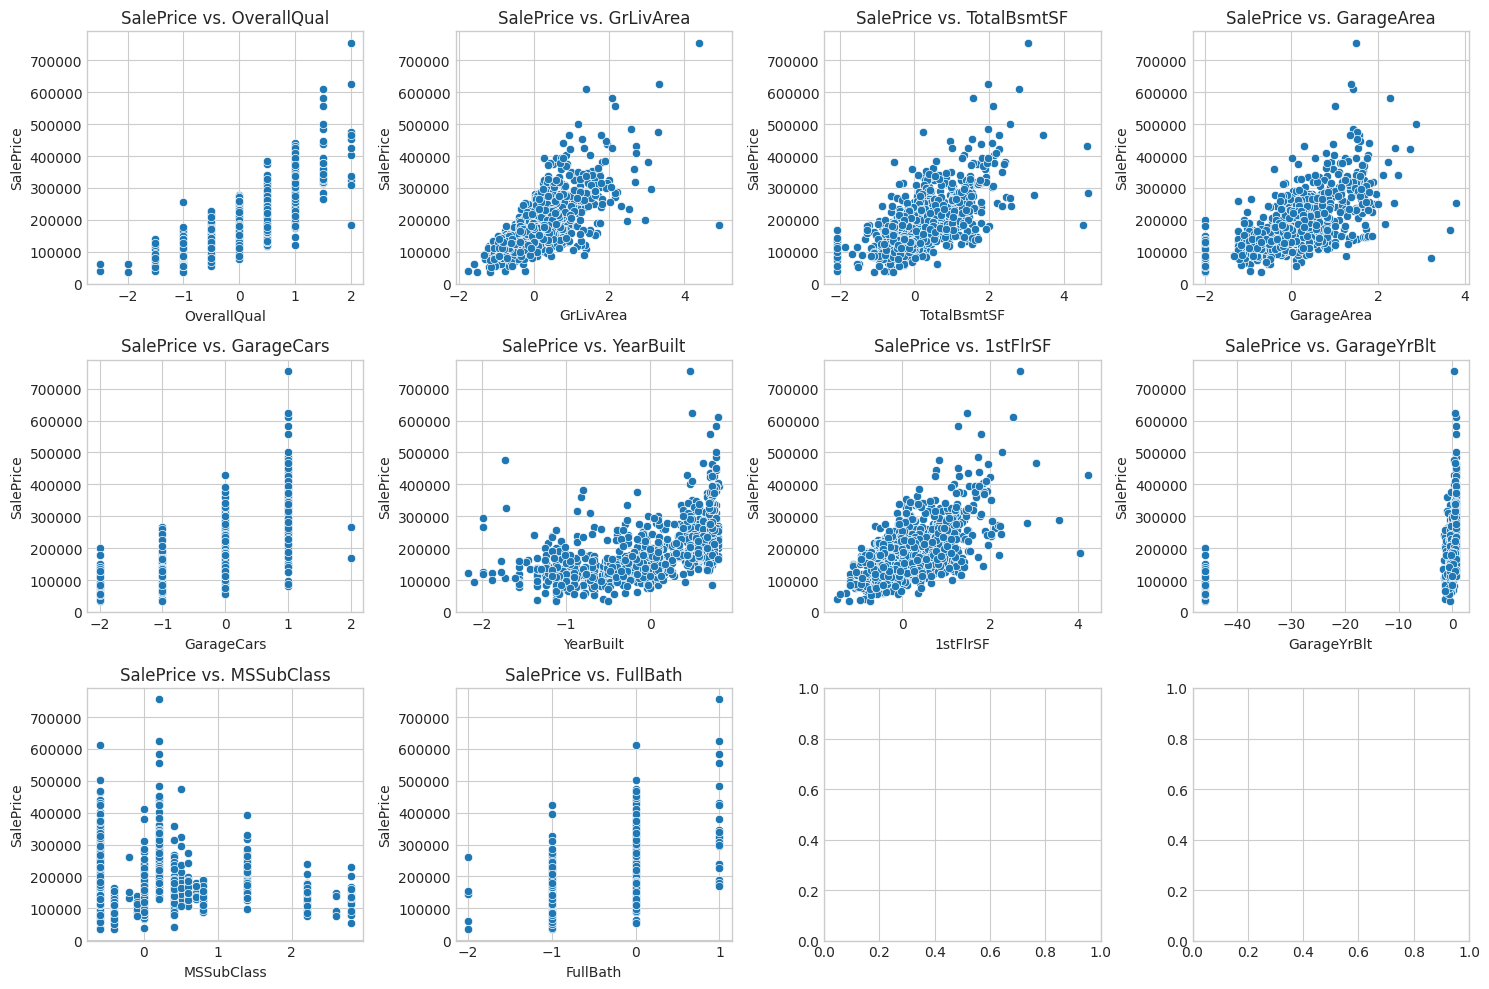

'\nimputed_X_train_scaled\nOverallQual    0.554058\nGrLivArea      0.487686\nTotalBsmtSF    0.394656\nGarageArea     0.388752\nGarageCars     0.377961\nYearBuilt      0.355770\n1stFlrSF       0.328882\nGarageYrBlt    0.301436\nMSSubClass     0.275159\nFullBath       0.261760\n\nlabel_X_oe_train\nBsmtQual_encoded        0.321168\nExterQual_encoded       0.309763\nKitchenQual_encoded     0.309085\nFireplaceQu_encoded     0.222934\nBsmtFinType1_encoded    0.181573\nHeatingQC_encoded       0.155483\n\nOH_cols_train\n119    0.184356\n170    0.134949\n'

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

# test with numeric data label_X_oe_train, OH_cols_train
X = imputed_X_train_scaled.copy()
#X = label_X_oe_train.copy()
#X = OH_cols_train.copy()
y = y_train

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
print(mi_scores[:10])  # show the first 10 MI scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

# Concat data to generate relational plots
df = pd.concat([X, y], axis=1)


# column list to x axis
columns_x = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'YearBuilt', '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'FullBath']
#columns_x = ['BsmtQual_encoded','ExterQual_encoded', 'KitchenQual_encoded', 'FireplaceQu_encoded']


# Generate a figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))

# Iter columns and create the subplots
for i, col in enumerate(columns_x):
    row = i // 4  # Put row index 
    colu = i % 4  # Put col index 
    sns.scatterplot(x=col, y='SalePrice', data=df, ax=axes[row, colu])
    axes[row, colu].set_title(f'SalePrice vs. {col}')

plt.tight_layout()
plt.show()


'''
imputed_X_train_scaled
OverallQual    0.554058
GrLivArea      0.487686
TotalBsmtSF    0.394656
GarageArea     0.388752
GarageCars     0.377961
YearBuilt      0.355770
1stFlrSF       0.328882
GarageYrBlt    0.301436
MSSubClass     0.275159
FullBath       0.261760

label_X_oe_train
BsmtQual_encoded        0.321168
ExterQual_encoded       0.309763
KitchenQual_encoded     0.309085
FireplaceQu_encoded     0.222934
BsmtFinType1_encoded    0.181573
HeatingQC_encoded       0.155483

OH_cols_train
119    0.184356
170    0.134949
'''



# Feature engineering
- Reviewing the condition fields to split into your different categories. This option is not improved the results of the previous ohe method

In [25]:
# The condition fields are categorical fields and are in the cols_catohe list

train = df_cat_train.copy()
X_train_tmp = train[cols_cat_ohe]

valid = df_cat_valid.copy()
X_valid_tmp = valid[cols_cat_ohe]

print("BEFORE \n", X_train_tmp.shape)
print("X_train_tmp", X_train_tmp[['Condition1', 'Condition2']].head())

conditions_col = ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn', 'PosN', 'PosA', 'RRNe', 'RRAe']
conditions_col_encoded = [str("cond_"+i) for i in conditions_col]
conditions_col_encoded_sum = [str("sum_"+i) for i in conditions_col_encoded]


for col in conditions_col:
    X_train_tmp[f'cond_{col}'] = ((X_train_tmp['Condition1'] == col) | (X_train_tmp['Condition2'] == col))
    X_valid_tmp[f'cond_{col}'] = ((X_valid_tmp['Condition1'] == col) | (X_valid_tmp['Condition2'] == col))

X_train_tmp = X_train_tmp.drop(['Condition1', 'Condition2'], axis = 1)
X_valid_tmp = X_valid_tmp.drop(['Condition1', 'Condition2'], axis = 1)
    
print("AFTER \n",X_train_tmp.shape)
print("X_train_tmp", X_train_tmp[conditions_col_encoded].head())

# new column with the counter data by rows
X_train_tmp["conditions_col_encoded"] = X_train_tmp[conditions_col_encoded].sum(axis=1)

print("RESUME \n",X_train_tmp[conditions_col_encoded + ["conditions_col_encoded"]].head(10))

# new columns with the counter data by columns
for col in conditions_col_encoded:
    X_train_tmp[f'sum_{col}'] = X_train_tmp[col].sum()

print("RESUME2 \n",X_train_tmp[conditions_col_encoded + ["conditions_col_encoded"] + conditions_col_encoded_sum].head())

PREVIO 
 (1168, 24)
X_train_tmp     Functional Condition1 Condition2
618        Typ       Norm       Norm
870        Typ       PosN       Norm
92         Typ       Norm       Norm
817        Typ       Norm       Norm
302        Typ       Norm       Norm
DESPUES 
 (1168, 31)
X_train_tmp      cond_Artery  cond_Feedr  cond_Norm  cond_RRNn  cond_RRAn  cond_PosN  \
618        False       False       True      False      False      False   
870        False       False       True      False      False       True   
92         False       False       True      False      False      False   
817        False       False       True      False      False      False   
302        False       False       True      False      False      False   

     cond_PosA  cond_RRNe  cond_RRAe  
618      False      False      False  
870      False      False      False  
92       False      False      False  
817      False      False      False  
302      False      False      False  
resumen 
       cond_A

/tmp/ipykernel_33/3534432066.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_tmp[f'cond_{col}'] = ((X_train_tmp['Condition1'] == col) | (X_train_tmp['Condition2'] == col))
/tmp/ipykernel_33/3534432066.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_tmp[f'cond_{col}'] = ((X_valid_tmp['Condition1'] == col) | (X_valid_tmp['Condition2'] == col))
/tmp/ipykernel_33/3534432066.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Asymmetric test in one column


In [6]:
# Supongamos que tenemos un DataFrame llamado 'data'
data = pd.DataFrame({'edad': [25, 30, 35, 40, 50, 60, 70]})

# Calculamos la asimetría de la columna 'edad'
skewness = data['edad'].skew()
print(skewness)

0.5305985361681934


## Normal distribution test in all data
 - The data does not follow a Normal distribution
 - Reviewing some columns OverallQual, GrLivArea, LotArea, MasVnrArea

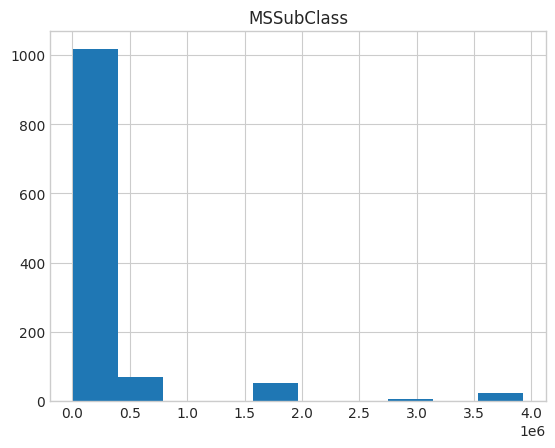

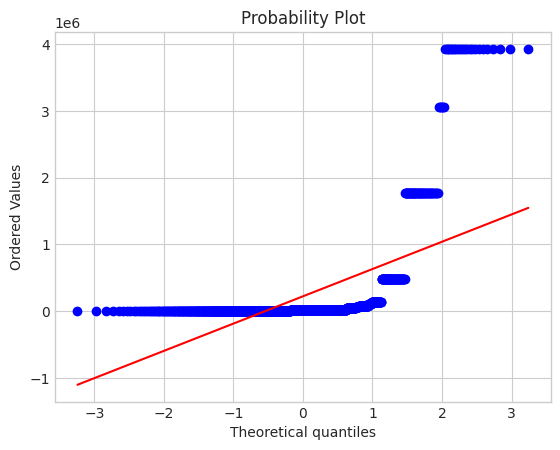

Shapiro-Wilk test: ShapiroResult(statistic=0.35207200050354004, pvalue=0.0)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=324.64604072931536, statistic_sign=-1)
Anderson-Darling test: AndersonResult(statistic=311.6944908807609, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=222006.50821714246, scale=688212.4274969966)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


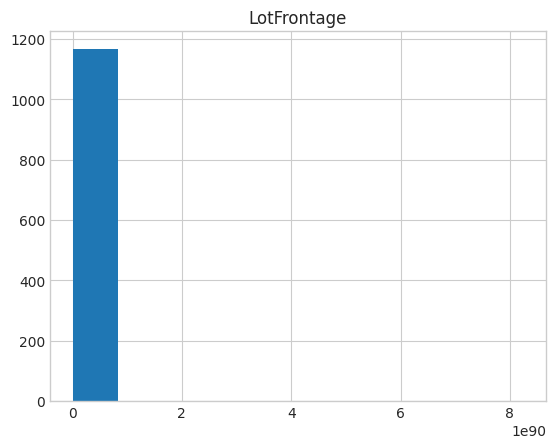

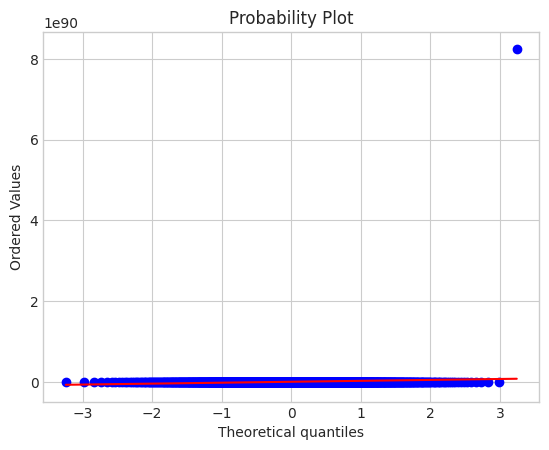

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


Shapiro-Wilk test: ShapiroResult(statistic=nan, pvalue=1.0)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1166170834.8926673, statistic_sign=-1)
Anderson-Darling test: AndersonResult(statistic=450.8978859914205, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=7.061978693254128e+87, scale=2.413502896180635e+89)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


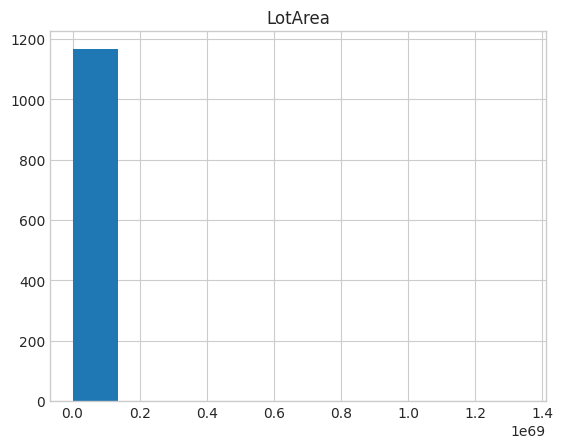

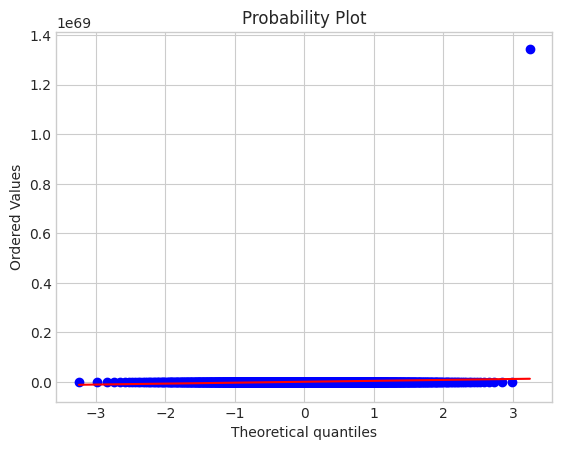

/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1877: RuntimeWarning: overflow encountered in cast
  a, w, pw, ifault = _statlib.swilk(y, a[:N//2], init)


Shapiro-Wilk test: ShapiroResult(statistic=nan, pvalue=1.0)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2.4197007987965184e+22, statistic_sign=-1)
Anderson-Darling test: AndersonResult(statistic=450.8414550984403, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.151936410855858e+66, scale=3.9327445212273066e+67)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


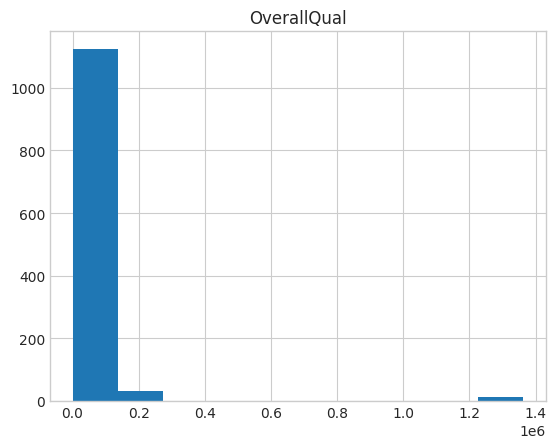

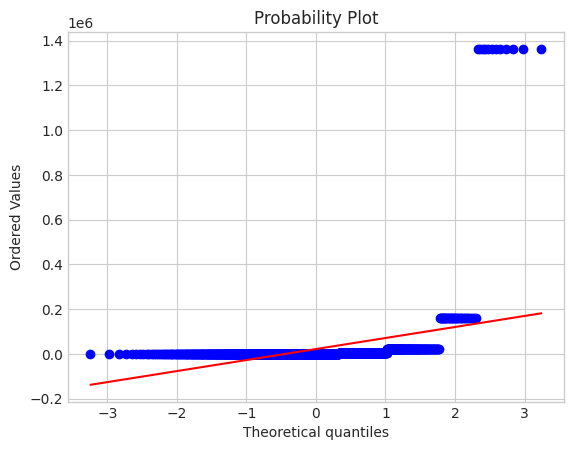

Shapiro-Wilk test: ShapiroResult(statistic=0.1260993480682373, pvalue=0.0)
Kolmogorov-Smirnov test: KstestResult(statistic=0.9954420733195751, pvalue=0.0, statistic_location=3.453087342900134, statistic_sign=-1)
Anderson-Darling test: AndersonResult(statistic=384.71430706757906, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=21415.45140129223, scale=139278.34119487414)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


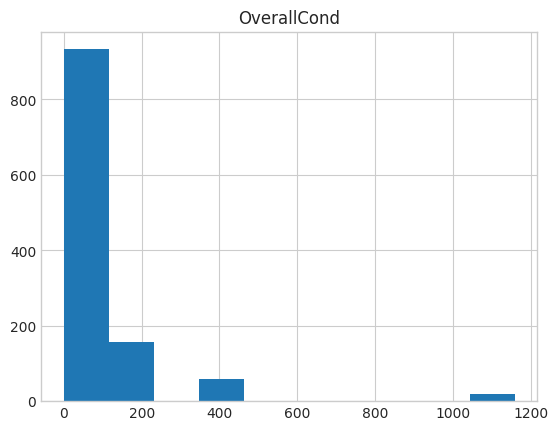

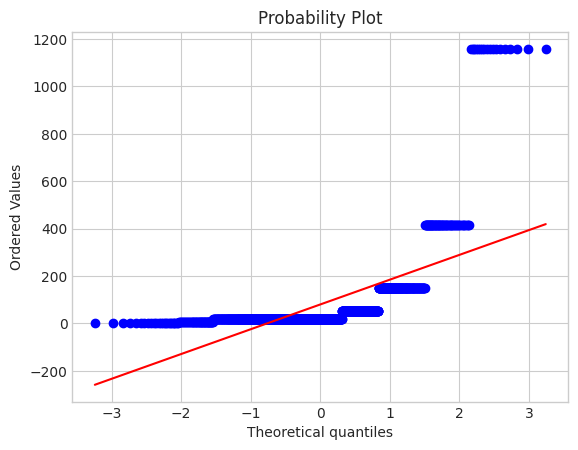

Shapiro-Wilk test: ShapiroResult(statistic=0.4072995185852051, pvalue=0.0)
Kolmogorov-Smirnov test: KstestResult(statistic=0.9910879642574056, pvalue=0.0, statistic_location=2.671553709445341, statistic_sign=-1)
Anderson-Darling test: AndersonResult(statistic=231.2751342279489, critical_values=array([0.574, 0.654, 0.784, 0.915, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=79.49572083979064, scale=163.72690996553794)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


ValueError: supplied range of [inf, inf] is not finite

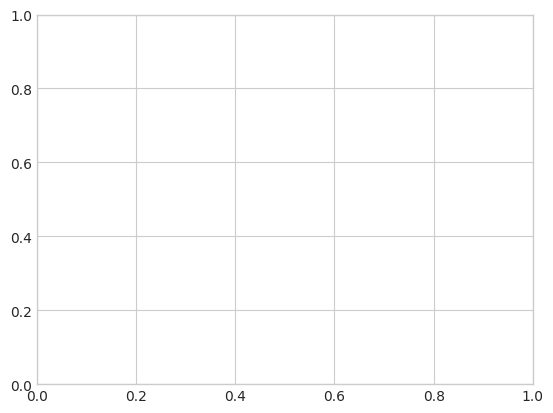

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import boxcox

cols = ['GrLivArea', 'OverallQual', 'LotArea', 'MasVnrArea']

for i in imputed_X_train.columns:
    # Find the lambda best parameter to Box-Cox transformation
    best_lambda, _ = stats.boxcox(imputed_X_train[i])

    # Apply transform
    imputed_X_train[f'lambda_{i}'] = stats.boxcox(imputed_X_train[i], lmbda=best_lambda)

    plt.hist(imputed_X_train[f'lambda_{i}'], bins=10)  # Ajusta el número de bins según tus datos
    plt.title(i)
    plt.show()

    stats.probplot(imputed_X_train[f'lambda_{i}'], plot=plt)  # Gráfico Q-Q
    plt.show()

    # stadistic tests
    shapiro_test = stats.shapiro(imputed_X_train[f'lambda_{i}'])
    print("Shapiro-Wilk test:", shapiro_test)

    kstest = stats.kstest(imputed_X_train[f'lambda_{i}'], 'norm')  # 'norm' indica distribución normal
    print("Kolmogorov-Smirnov test:", kstest)

    anderson_result = stats.anderson(imputed_X_train[f'lambda_{i}'], dist='norm')
    print("Anderson-Darling test:", anderson_result)

## Remove fields do not add value

In [58]:
# This columns do not add value, only one value dominate. 
# Remove columns whose most frequent value has a frequency greater than 96% of the data. 

# df_cat_train --> ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
# df_num_train -->  ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']

dominate_cat = []
for i in df_cat_train.columns:
    counts = X_train_init[i].value_counts()
    common = counts.iloc[0]
    if common / len(X_train_init) * 100 > 95:
        dominate_cat.append(i)

print("Category columns with >95% of the same value: ", dominate_cat)

dominate_num = []
for i in df_num_train.columns:
    counts = X_train_init[i].value_counts()
    common = counts.iloc[0]
    if common / len(X_train_init) * 100 > 95:
        dominate_num.append(i)
        
dominate_num = list(dominate_num)

print("Numeric columns with >95% of the same value: ", dominate_num)


'''
X_train_init = X_train_init.drop(dominate_cat, axis=1)# only one value dominate so drop as it is meaningless
X_train_init = X_train_init.drop(dominate_num, axis=1)# only one value dominate so drop as it is meaningless

X_valid_init = X_valid_init.drop(dominate_cat, axis=1)# only one value dominate so drop as it is meaningless
X_valid_init = X_valid_init.drop(dominate_num, axis=1)# only one value dominate so drop as it is meaningless
'''

Category columns with >95% of the same value:  ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numeric columns with >95% of the same value:  ['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


# Apply Neuronal Network

In [93]:
import tensorflow as tf
import numpy as np

In [94]:
#celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
#fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print(sel_X_train.shape)
print(sel_X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

print(all_X_train.shape)
print(all_X_valid.shape)


(1168, 10)
(292, 10)
(1168,)
(292,)
(1168, 230)
(292, 230)


In [98]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[10])
#modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[10])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mean_squared_error'
)

In [100]:
print("Comenzando entrenamiento...")
#historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
historial = modelo.fit(sel_X_train, y_train, epochs=100, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


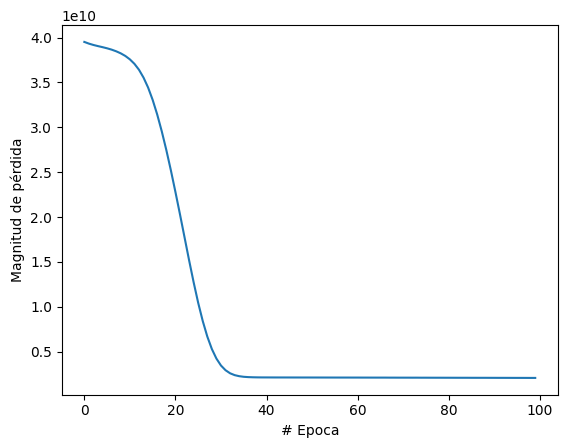

In [101]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [102]:
print("Hagamos una predicción!")
preds = modelo.predict(sel_X_valid)
print("El resultado es ", preds.size)

Hagamos una predicción!
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
El resultado es  292


In [103]:
from sklearn.metrics import mean_squared_error

# Calcular MSE y NMSE
mse = mean_squared_error(y_valid, preds)
nmse = mse / np.var(y_valid)
print("mse", mse)
print("nmse", nmse)
print(y_valid, preds)


mse 3460421478.01779
nmse 0.5010855283643697
529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
326     324000
440     555000
1387    136000
1323     82500
61      101000
Name: SalePrice, Length: 292, dtype: int64 [[319462.8  ]
 [160562.62 ]
 [142509.34 ]
 [217261.38 ]
 [110388.086]
 [140867.34 ]
 [219841.97 ]
 [157220.34 ]
 [454452.8  ]
 [123517.586]
 [191147.83 ]
 [234446.22 ]
 [203159.77 ]
 [124946.65 ]
 [146394.58 ]
 [177678.25 ]
 [197597.28 ]
 [123173.664]
 [165962.16 ]
 [173069.56 ]
 [175139.38 ]
 [126438.73 ]
 [126970.63 ]
 [148122.34 ]
 [194795.69 ]
 [181335.31 ]
 [162199.62 ]
 [ 78633.68 ]
 [248966.22 ]
 [141586.84 ]
 [257462.75 ]
 [180324.22 ]
 [135892.44 ]
 [242602.1  ]
 [295094.38 ]
 [151124.78 ]
 [221604.72 ]
 [132445.69 ]
 [210087.81 ]
 [283068.94 ]
 [263677.38 ]
 [163973.08 ]
 [182677.61 ]
 [270479.94 ]
 [297163.5  ]
 [231730.55 ]
 [138038.22 ]
 [126399.26 ]
 [178746.34 ]
 [ 99214.69 ]
 [292621.75 ]
 [158712.69 ]
 [197267.97 ]
 [ 98